# Establecemos las librerías

In [1]:
import pandas as pd
import pandas_datareader.data as reader
import requests
import datetime as dt
import numpy as np
from scipy.stats import percentileofscore as score
from statistics import mean
from math import floor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import norm
import yfinance as yf
import datetime
import time

# Traemos la data del INPC¶

In [4]:
import pandas as pd
# La libreria request sirve para hacer peticiones http (GET o POST), En este caso el proposito es extraer 
# los nombres de las emisoras que componen el INPC
import requests
url_linkINPC = 'https://finance.yahoo.com/quote/%5EMXX/components?p=%5EMXX'
rINPC = requests.get(url_linkINPC,headers ={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
# Con pd.read_html estamos convirtiendo los datos que se encuentran en etiquetas html en datos estructurados (Tabla)
tableINPC = pd.read_html(rINPC.text)
print(tableINPC)

[           Symbol                                       Company Name  \
0       IENOVA.MX    Infraestructura Energética Nova, S.A.B. de C.V.   
1         AMXL.MX                      América Móvil, S.A.B. de C.V.   
2       BOLSAA.MX          Bolsa Mexicana de Valores, S.A.B. de C.V.   
3      KIMBERA.MX        Kimberly-Clark de México, S. A. B. de C. V.   
4     GMEXICOB.MX                       Grupo México, S.A.B. de C.V.   
5      MEGACPO.MX              Megacable Holdings, S. A. B. de C. V.   
6     GCARSOA1.MX                        Grupo Carso, S.A.B. de C.V.   
7      GENTERA.MX                            Gentera, S.A.B. de C.V.   
8           AC.MX                   Arca Continental, S.A.B. de C.V.   
9         GAPB.MX   Grupo Aeroportuario del Pacífico, S.A.B. de C.V.   
10      GRUMAB.MX                              Gruma, S.A.B. de C.V.   
11       ASURB.MX  Grupo Aeroportuario del Sureste, S. A. B. de C...   
12        LABB.MX          Genomma Lab Internacional, S.A.B. de

In [5]:
# Solamente nos interesa la primera columna ya que queremos los nombres de las emisoras, .tolist() genera una lista
# de aquellas instancias que se encuentran en la columna especificada
tickersINPC = tableINPC[0].Symbol.tolist()
tickersINPC

['IENOVA.MX',
 'AMXL.MX',
 'BOLSAA.MX',
 'KIMBERA.MX',
 'GMEXICOB.MX',
 'MEGACPO.MX',
 'GCARSOA1.MX',
 'GENTERA.MX',
 'AC.MX',
 'GAPB.MX',
 'GRUMAB.MX',
 'ASURB.MX',
 'LABB.MX',
 'ALSEA.MX',
 'TLEVISACPO.MX',
 'PINFRA.MX',
 'GFNORTEO.MX',
 'GCC.MX',
 'FEMSAUBD.MX',
 'OMAB.MX',
 'BIMBOA.MX',
 'CEMEXCPO.MX',
 'CUERVO.MX',
 'ALPEKA.MX',
 'LIVEPOLC1.MX',
 'MEXCHEM.MX',
 'KOFL.MX',
 'BBAJIOO.MX',
 'PEOLES.MX',
 'SITESB1.MX']

In [8]:
import datetime as dt
import time
# Definimos el plazo de nuestra data
start = '2021-12-31'
end = dt.datetime.now().date().isoformat()        
# leemos la data directo de yahoo finance
prices_df = yf.download(' '.join(tickersINPC), start, end)['Adj Close']
returns_df = prices_df.pct_change()[1:]

[*********************100%***********************]  30 of 30 completed

5 Failed downloads:
- KOFL.MX: No data found, symbol may be delisted
- LIVEPOLC1.MX: No data found for this date range, symbol may be delisted
- PEOLES.MX: No data found, symbol may be delisted
- MEXCHEM.MX: No data found, symbol may be delisted
- SITESB1.MX: No data found, symbol may be delisted


In [10]:
dfINPC=pd.DataFrame(prices_df)
dfINPC

AC.MX  ALPEKA.MX   ALSEA.MX    AMXL.MX    ASURB.MX  \
Date                                                                  
2021-12-31  124.924347  22.142111  37.950001  21.176628  404.209961   
2022-01-03  123.010094  22.231554  39.939999  21.010651  403.617157   
2022-01-04  125.259338  22.062607  41.029999  21.196154  405.185211   
2022-01-05  124.187355  21.863844  41.900002  21.166864  407.967499   
2022-01-06  123.220665  21.565701  41.779999  20.786095  415.473083   
...                ...        ...        ...        ...         ...   
2023-02-10  152.110001  27.900000  43.849998  18.450001  501.929993   
2023-02-13  154.990005  28.350000  43.990002  18.660000  517.940002   
2023-02-14  153.149994  28.430000  43.270000  18.570000  509.220001   
2023-02-15  154.389999  28.480000  43.299999  18.600000  514.989990   
2023-02-16  153.770004  24.760000  44.160000  19.020000  512.619995   

            BBAJIOO.MX  BIMBOA.MX  BOLSAA.MX  CEMEXCPO.MX  CUERVO.MX  ...  \
Date                                                                  ...   
2021-12-31   31.350657  61.804214  36.755547        13.99  50.892120  ...   
2022-01-03   32.441116  61.313469  36.774437        13.78  50.802937  ...   
2022-01-04   32.756325  61.745319  36.094479        13.70  50.674122  ...   
2022-01-05   32.398518  59.860870  35.433407        13.69  50.347130  ...   
2022-01-06   32.884113  62.510880  35.707283        13.46  50.099407  ...   
...                ...        ...        ...          ...        ...  ...   
2023-02-10   68.110001  89.070000  39.400002         9.69  44.919998  ...   
2023-02-13   70.010002  89.629997  39.759998         9.78  46.259998  ...   
2023-02-14   67.870003  88.690002  38.860001         9.69  45.610001  ...   
2023-02-15   69.580002  89.580002  39.090000         9.85  45.549999  ...   
2023-02-16   70.519997  88.900002  39.000000         9.58  45.570000  ...   

            KOFL.MX    LABB.MX  LIVEPOLC1.MX  MEGACPO.MX  MEXCHEM.MX  \
Date                                                                   
2021-12-31      NaN  20.107199           NaN   66.381622         NaN   
2022-01-03      NaN  19.985508           NaN   63.650608         NaN   
2022-01-04      NaN  19.854454           NaN   63.431751         NaN   
2022-01-05      NaN  19.545546           NaN   63.612541         NaN   
2022-01-06      NaN  19.751486           NaN   62.860802         NaN   
...             ...        ...           ...         ...         ...   
2023-02-10      NaN  17.930000           NaN   58.119999         NaN   
2023-02-13      NaN  17.860001           NaN   60.540001         NaN   
2023-02-14      NaN  17.620001           NaN   56.480000         NaN   
2023-02-15      NaN  17.700001           NaN   56.360001         NaN   
2023-02-16      NaN  17.490000           NaN   55.279999         NaN   

               OMAB.MX  PEOLES.MX   PINFRA.MX  SITESB1.MX  TLEVISACPO.MX  
Date                                                                      
2021-12-31  120.648079        NaN  147.610107         NaN      38.203770  
2022-01-03  120.007599        NaN  147.886887         NaN      38.411884  
2022-01-04  119.446075        NaN  148.025269         NaN      38.649731  
2022-01-05  120.209389        NaN  148.551117         NaN      39.432636  
2022-01-06  120.376099        NaN  147.047348         NaN      39.878593  
...                ...        ...         ...         ...            ...  
2023-02-10  171.669998        NaN  179.820007         NaN      21.230000  
2023-02-13  176.929993        NaN  177.669998         NaN      21.860001  
2023-02-14  176.520004        NaN  176.570007         NaN      21.360001  
2023-02-15  178.009995        NaN  175.210007         NaN      21.350000  
2023-02-16  178.500000        NaN  175.380005         NaN      21.650000  

[286 rows x 30 columns]

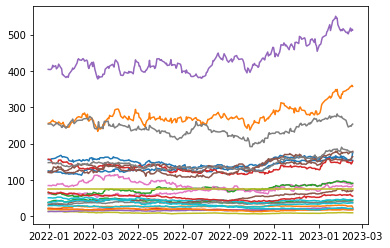

In [11]:
# Visualizamos la data a tarves del tiempo
plt.figure()
plt.plot(dfINPC)
plt.show()

In [12]:
# Agrupamos la data semanalmente (el promedio por semana)
df_weekINPC = dfINPC.groupby(pd.PeriodIndex(dfINPC.index, freq='W')).mean()
#df_week = df_week[['Adj Close']]
df_weekINPC

AC.MX  ALPEKA.MX   ALSEA.MX    AMXL.MX  \
Date                                                                 
2021-12-27/2022-01-02  124.924347  22.142111  37.950001  21.176628   
2022-01-03/2022-01-09  123.716452  21.849931  41.575999  20.909112   
2022-01-10/2022-01-16  122.041475  21.549799  43.192001  20.323314   
2022-01-17/2022-01-23  119.275377  23.304870  42.052000  19.676982   
2022-01-24/2022-01-30  117.118011  23.821651  40.442001  19.065799   
2022-01-31/2022-02-06  116.867239  26.008035  44.840000  18.880296   
2022-02-07/2022-02-13  115.613880  27.819257  46.925000  18.657692   
2022-02-14/2022-02-20  119.838170  26.616248  46.289999  18.446804   
2022-02-21/2022-02-27  129.099333  26.079590  44.338001  17.917633   
2022-02-28/2022-03-06  126.985997  26.401585  46.220000  18.591301   
2022-03-07/2022-03-13  123.815994  26.767126  45.830000  19.329408   
2022-03-14/2022-03-20  124.260095  26.550639  49.274000  19.557870   
2022-03-21/2022-03-27  122.275492  26.933408  48.402500  20.373595   
2022-03-28/2022-04-03  127.200389  26.648325  49.148000  20.485385   
2022-04-04/2022-04-10  125.802988  27.248396  48.116000  21.192248   
2022-04-11/2022-04-17  121.726021  27.461711  46.266668  21.368639   
2022-04-18/2022-04-24  127.972517  27.956121  45.586000  21.246923   
2022-04-25/2022-05-01  127.622981  27.597275  44.816000  20.397514   
2022-05-02/2022-05-08  126.943538  27.352063  43.820000  19.079467   
2022-05-09/2022-05-15  127.369656  25.781113  41.814000  18.991598   
2022-05-16/2022-05-22  127.937170  25.880794  43.502000  19.911302   
2022-05-23/2022-05-29  129.394237  26.048255  43.410001  21.369941   
2022-05-30/2022-06-05  129.066301  26.056230  42.594000  20.383846   
2022-06-06/2022-06-12  125.877246  26.658294  43.352000  19.206391   
2022-06-13/2022-06-19  126.464394  25.980473  39.350000  19.321598   
2022-06-20/2022-06-26  127.654395  26.129991  38.584000  19.479764   
2022-06-27/2022-07-03  130.654935  27.663063  38.898000  20.055798   
2022-07-04/2022-07-10  133.292188  27.425826  37.172000  20.057751   
2022-07-11/2022-07-17  133.243091  27.567370  36.738000  19.452426   
2022-07-18/2022-07-24  132.253392  26.855659  38.374000  18.780710   
2022-07-25/2022-07-31  138.574548  26.682216  38.926000  18.622544   
2022-08-01/2022-08-07  137.700696  26.981255  40.680001  18.276923   
2022-08-08/2022-08-14  136.064932  27.493608  39.062000  18.552248   
2022-08-15/2022-08-21  140.836737  28.059788  38.230000  18.864674   
2022-08-22/2022-08-28  138.918192  28.239211  37.158000  18.351977   
2022-08-29/2022-09-04  135.899979  27.479652  36.853999  17.480000   
2022-09-05/2022-09-11  136.310394  27.473671  37.432000  17.338000   
2022-09-12/2022-09-18  137.446892  27.728353  38.620000  17.157500   
2022-09-19/2022-09-25  136.936816  27.487627  37.634000  16.978395   
2022-09-26/2022-10-02  139.560324  25.525934  35.638000  16.868858   
2022-10-03/2022-10-09  140.993829  26.797845  36.600000  16.686000   
2022-10-10/2022-10-16  140.883859  26.576557  35.460000  16.478000   
2022-10-17/2022-10-23  142.421436  27.814576  36.912000  16.766000   
2022-10-24/2022-10-30  152.031799  27.541455  37.430001  18.094000   
2022-10-31/2022-11-06  161.354965  28.321446  37.847501  18.995000   
2022-11-07/2022-11-13  164.786044  28.158000  38.630000  19.616000   
2022-11-14/2022-11-20  163.967178  28.300000  38.852000  19.438000   
2022-11-21/2022-11-27  161.213692  28.190000  40.595000  19.865000   
2022-11-28/2022-12-04  161.122003  27.444000  39.236000  18.718000   
2022-12-05/2022-12-11  162.972000  27.408000  38.960001  18.268000   
2022-12-12/2022-12-18  163.562500  27.280000  38.990001  17.915000   
2022-12-19/2022-12-25  163.857999  27.892000  37.132000  18.116000   
2022-12-26/2023-01-01  160.084000  28.006000  37.257999  17.956000   
2023-01-02/2023-01-08  161.559998  27.798000  37.818000  18.132000   
2023-01-09/2023-01-15  161.670001  28.854000  41.438000  18.966000   
2023-01-16/2023-01-22  162.372000  29.

In [13]:
# Limpiamos nuestra data (Queremos eliminar las columnas cuando exista información nula)
# esto debido a que el análisis de nuestro modelo no permite datos nulos
df_weekINPC=df_weekINPC.dropna(axis=1)
df_weekINPC

AC.MX  ALPEKA.MX   ALSEA.MX    AMXL.MX  \
Date                                                                 
2021-12-27/2022-01-02  124.924347  22.142111  37.950001  21.176628   
2022-01-03/2022-01-09  123.716452  21.849931  41.575999  20.909112   
2022-01-10/2022-01-16  122.041475  21.549799  43.192001  20.323314   
2022-01-17/2022-01-23  119.275377  23.304870  42.052000  19.676982   
2022-01-24/2022-01-30  117.118011  23.821651  40.442001  19.065799   
2022-01-31/2022-02-06  116.867239  26.008035  44.840000  18.880296   
2022-02-07/2022-02-13  115.613880  27.819257  46.925000  18.657692   
2022-02-14/2022-02-20  119.838170  26.616248  46.289999  18.446804   
2022-02-21/2022-02-27  129.099333  26.079590  44.338001  17.917633   
2022-02-28/2022-03-06  126.985997  26.401585  46.220000  18.591301   
2022-03-07/2022-03-13  123.815994  26.767126  45.830000  19.329408   
2022-03-14/2022-03-20  124.260095  26.550639  49.274000  19.557870   
2022-03-21/2022-03-27  122.275492  26.933408  48.402500  20.373595   
2022-03-28/2022-04-03  127.200389  26.648325  49.148000  20.485385   
2022-04-04/2022-04-10  125.802988  27.248396  48.116000  21.192248   
2022-04-11/2022-04-17  121.726021  27.461711  46.266668  21.368639   
2022-04-18/2022-04-24  127.972517  27.956121  45.586000  21.246923   
2022-04-25/2022-05-01  127.622981  27.597275  44.816000  20.397514   
2022-05-02/2022-05-08  126.943538  27.352063  43.820000  19.079467   
2022-05-09/2022-05-15  127.369656  25.781113  41.814000  18.991598   
2022-05-16/2022-05-22  127.937170  25.880794  43.502000  19.911302   
2022-05-23/2022-05-29  129.394237  26.048255  43.410001  21.369941   
2022-05-30/2022-06-05  129.066301  26.056230  42.594000  20.383846   
2022-06-06/2022-06-12  125.877246  26.658294  43.352000  19.206391   
2022-06-13/2022-06-19  126.464394  25.980473  39.350000  19.321598   
2022-06-20/2022-06-26  127.654395  26.129991  38.584000  19.479764   
2022-06-27/2022-07-03  130.654935  27.663063  38.898000  20.055798   
2022-07-04/2022-07-10  133.292188  27.425826  37.172000  20.057751   
2022-07-11/2022-07-17  133.243091  27.567370  36.738000  19.452426   
2022-07-18/2022-07-24  132.253392  26.855659  38.374000  18.780710   
2022-07-25/2022-07-31  138.574548  26.682216  38.926000  18.622544   
2022-08-01/2022-08-07  137.700696  26.981255  40.680001  18.276923   
2022-08-08/2022-08-14  136.064932  27.493608  39.062000  18.552248   
2022-08-15/2022-08-21  140.836737  28.059788  38.230000  18.864674   
2022-08-22/2022-08-28  138.918192  28.239211  37.158000  18.351977   
2022-08-29/2022-09-04  135.899979  27.479652  36.853999  17.480000   
2022-09-05/2022-09-11  136.310394  27.473671  37.432000  17.338000   
2022-09-12/2022-09-18  137.446892  27.728353  38.620000  17.157500   
2022-09-19/2022-09-25  136.936816  27.487627  37.634000  16.978395   
2022-09-26/2022-10-02  139.560324  25.525934  35.638000  16.868858   
2022-10-03/2022-10-09  140.993829  26.797845  36.600000  16.686000   
2022-10-10/2022-10-16  140.883859  26.576557  35.460000  16.478000   
2022-10-17/2022-10-23  142.421436  27.814576  36.912000  16.766000   
2022-10-24/2022-10-30  152.031799  27.541455  37.430001  18.094000   
2022-10-31/2022-11-06  161.354965  28.321446  37.847501  18.995000   
2022-11-07/2022-11-13  164.786044  28.158000  38.630000  19.616000   
2022-11-14/2022-11-20  163.967178  28.300000  38.852000  19.438000   
2022-11-21/2022-11-27  161.213692  28.190000  40.595000  19.865000   
2022-11-28/2022-12-04  161.122003  27.444000  39.236000  18.718000   
2022-12-05/2022-12-11  162.972000  27.408000  38.960001  18.268000   
2022-12-12/2022-12-18  163.562500  27.280000  38.990001  17.915000   
2022-12-19/2022-12-25  163.857999  27.892000  37.132000  18.116000   
2022-12-26/2023-01-01  160.084000  28.006000  37.257999  17.956000   
2023-01-02/2023-01-08  161.559998  27.798000  37.818000  18.132000   
2023-01-09/2023-01-15  161.670001  28.854000  41.438000  18.966000   
2023-01-16/2023-01-22  162.372000  29.

In [14]:
# Verificamos el número de emisoras que si tienen data durante todo el intervalo de tiempo
lINPC=len(df_weekINPC.columns)
lINPC

25

In [15]:
# Creamos un ciclo for debido a que queremos que a cada emisora le agregue la palabra week (semana)
for i in range(len(df_weekINPC.columns)):
    x='week{}'.format(i)
    print(x)

week0
week1
week2
week3
week4
week5
week6
week7
week8
week9
week10
week11
week12
week13
week14
week15
week16
week17
week18
week19
week20
week21
week22
week23
week24


/var/folders/43/rjb4lnjj3454l25zdv9_dphm0000gn/T/ipykernel_48376/2423571793.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekINPC[x]=np.log(df_weekINPC.iloc[:,i]).diff()
/var/folders/43/rjb4lnjj3454l25zdv9_dphm0000gn/T/ipykernel_48376/2423571793.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekINPC.dropna(inplace=True)
/var/folders/43/rjb4lnjj3454l25zdv9_dphm0000gn/T/ipykernel_48376/2423571793.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

/var/folders/43/rjb4lnjj3454l25zdv9_dphm0000gn/T/ipykernel_48376/2423571793.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekINPC[x]=np.log(df_weekINPC.iloc[:,i]).diff()
/var/folders/43/rjb4lnjj3454l25zdv9_dphm0000gn/T/ipykernel_48376/2423571793.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekINPC.dropna(inplace=True)
/var/folders/43/rjb4lnjj3454l25zdv9_dphm0000gn/T/ipykernel_48376/2423571793.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

/var/folders/43/rjb4lnjj3454l25zdv9_dphm0000gn/T/ipykernel_48376/2423571793.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekINPC[x]=np.log(df_weekINPC.iloc[:,i]).diff()
/var/folders/43/rjb4lnjj3454l25zdv9_dphm0000gn/T/ipykernel_48376/2423571793.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekINPC.dropna(inplace=True)
/var/folders/43/rjb4lnjj3454l25zdv9_dphm0000gn/T/ipykernel_48376/2423571793.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

AC.MX  ALPEKA.MX   ALSEA.MX    AMXL.MX  \
Date                                                                 
2022-06-20/2022-06-26  127.654395  26.129991  38.584000  19.479764   
2022-06-27/2022-07-03  130.654935  27.663063  38.898000  20.055798   
2022-07-04/2022-07-10  133.292188  27.425826  37.172000  20.057751   
2022-07-11/2022-07-17  133.243091  27.567370  36.738000  19.452426   
2022-07-18/2022-07-24  132.253392  26.855659  38.374000  18.780710   
2022-07-25/2022-07-31  138.574548  26.682216  38.926000  18.622544   
2022-08-01/2022-08-07  137.700696  26.981255  40.680001  18.276923   
2022-08-08/2022-08-14  136.064932  27.493608  39.062000  18.552248   
2022-08-15/2022-08-21  140.836737  28.059788  38.230000  18.864674   
2022-08-22/2022-08-28  138.918192  28.239211  37.158000  18.351977   
2022-08-29/2022-09-04  135.899979  27.479652  36.853999  17.480000   
2022-09-05/2022-09-11  136.310394  27.473671  37.432000  17.338000   
2022-09-12/2022-09-18  137.446892  27.728353  38.620000  17.157500   
2022-09-19/2022-09-25  136.936816  27.487627  37.634000  16.978395   
2022-09-26/2022-10-02  139.560324  25.525934  35.638000  16.868858   
2022-10-03/2022-10-09  140.993829  26.797845  36.600000  16.686000   
2022-10-10/2022-10-16  140.883859  26.576557  35.460000  16.478000   
2022-10-17/2022-10-23  142.421436  27.814576  36.912000  16.766000   
2022-10-24/2022-10-30  152.031799  27.541455  37.430001  18.094000   
2022-10-31/2022-11-06  161.354965  28.321446  37.847501  18.995000   
2022-11-07/2022-11-13  164.786044  28.158000  38.630000  19.616000   
2022-11-14/2022-11-20  163.967178  28.300000  38.852000  19.438000   
2022-11-21/2022-11-27  161.213692  28.190000  40.595000  19.865000   
2022-11-28/2022-12-04  161.122003  27.444000  39.236000  18.718000   
2022-12-05/2022-12-11  162.972000  27.408000  38.960001  18.268000   
2022-12-12/2022-12-18  163.562500  27.280000  38.990001  17.915000   
2022-12-19/2022-12-25  163.857999  27.892000  37.132000  18.116000   
2022-12-26/2023-01-01  160.084000  28.006000  37.257999  17.956000   
2023-01-02/2023-01-08  161.559998  27.798000  37.818000  18.132000   
2023-01-09/2023-01-15  161.670001  28.854000  41.438000  18.966000   
2023-01-16/2023-01-22  162.372000  29.172000  41.962000  19.640000   
2023-01-23/2023-01-29  163.925998  30.148000  44.462000  19.904000   
2023-01-30/2023-02-05  163.547998  30.332000  44.742000  19.442000   
2023-02-06/2023-02-12  156.325001  28.392499  44.239999  18.380001   
2023-02-13/2023-02-19  154.075001  27.505000  43.680000  18.712500   

                         ASURB.MX  BBAJIOO.MX  BIMBOA.MX  BOLSAA.MX  \
Date                                                                  
2022-06-20/2022-06-26  414.702002   37.211003  62.844883  36.160000   
2022-06-27/2022-07-03  408.341998   37.761092  65.306352  36.042000   
2022-07-04/2022-07-10  397.232001   38.520914  68.869527  35.368001   
2022-07-11/2022-07-17  385.980005   40.219013  69.637744  34.708001   
2022-07-18/2022-07-24  386.385992   41.186727  72.140900  35.574000   
2022-07-25/2022-07-31  382.345996   43.011771  73.149306  36.880000   
2022-08-01/2022-08-07  397.525995   43.280375  70.673943  37.224001   
2022-08-08/2022-08-14  420.215997   43.151592  75.033124  37.530000   
2022-08-15/2022-08-21  442.706000   42.549991  73.659465  38.242000   
2022-08-22/2022-08-28  436.651996   43.535012  73.185036  37.700000   
2022-08-29/2022-09-04  428.236005   42.943999  69.290358  36.762000   
2022-09-05/2022-09-11  431.682001   44.136000  71.154326  36.100000   
2022-09-12/2022-09-18  436.235001   47.070001  72.660484  35.932499   
2022-09-19/2022-09-25  423.424005   49.524000  72.861470  34.866000   
2022-09-26/2022-10-02  401.076001   49.963999  71.862990  33.722000   
2022-10-03/2022-10-09  416.138000   53.712000  71.382610  34.748000   
2022-10-10/2022-10-16  416.960004   55.218000  70.336482  34.500000   
2022-10-17/2022-10-23  434.538000   55.092000  70.920090  34.796000   
2022-10-24/2022-1

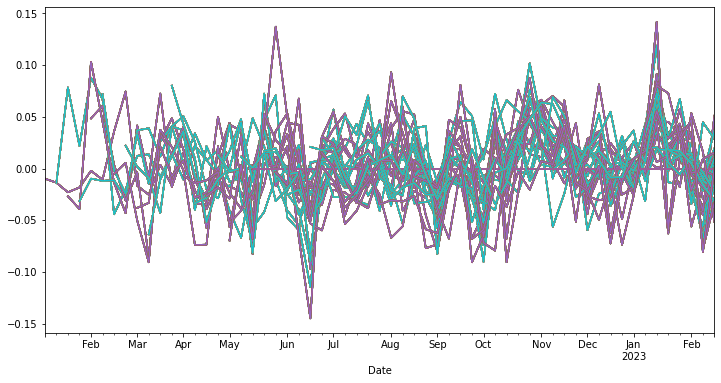

In [16]:
# Queremos obtener la gráfica de las volatilidades para cada una de las emisoras (logritmo natural de las diferencias)
for i in range(len(df_weekINPC.columns)):
    idem=df_weekINPC.columns.__getitem__(i)
    x='week {}'.format(idem)
    # Obtenemos los rendiemientos semanales
    df_weekINPC[x]=np.log(df_weekINPC.iloc[:,i]).diff()
    # borramos filas vacias
    df_weekINPC.dropna(inplace=True)
    # ciclo for para graficar
    for m in range(lINPC):
        df_weekINPC[x].plot(kind='line', figsize=(12, 6));
df_weekINPC

In [17]:
# Queremos quedarnos sólamente con los rendimientos semanales dentro de un Data Frame
udiffINPC=df_weekINPC.iloc[:, 25:]
udiffINPC

week AC.MX  week ALPEKA.MX  week ALSEA.MX  \
Date                                                               
2022-06-20/2022-06-26    0.009366        0.005739      -0.019658   
2022-06-27/2022-07-03    0.023233        0.057014       0.008105   
2022-07-04/2022-07-10    0.019984       -0.008613      -0.045387   
2022-07-11/2022-07-17   -0.000368        0.005148      -0.011744   
2022-07-18/2022-07-24   -0.007455       -0.026156       0.043569   
2022-07-25/2022-07-31    0.046689       -0.006479       0.014282   
2022-08-01/2022-08-07   -0.006326        0.011145       0.044074   
2022-08-08/2022-08-14   -0.011950        0.018811      -0.040586   
2022-08-15/2022-08-21    0.034469        0.020384      -0.021530   
2022-08-22/2022-08-28   -0.013716        0.006374      -0.028441   
2022-08-29/2022-09-04   -0.021966       -0.027266      -0.008215   
2022-09-05/2022-09-11    0.003015       -0.000218       0.015562   
2022-09-12/2022-09-18    0.008303        0.009227       0.031244   
2022-09-19/2022-09-25   -0.003718       -0.008719      -0.025862   
2022-09-26/2022-10-02    0.018977       -0.074041      -0.054495   
2022-10-03/2022-10-09    0.010219        0.048627       0.026636   
2022-10-10/2022-10-16   -0.000780       -0.008292      -0.031643   
2022-10-17/2022-10-23    0.010855        0.045531       0.040131   
2022-10-24/2022-10-30    0.065299       -0.009868       0.013936   
2022-10-31/2022-11-06    0.059517        0.027927       0.011092   
2022-11-07/2022-11-13    0.021041       -0.005788       0.020464   
2022-11-14/2022-11-20   -0.004982        0.005030       0.005730   
2022-11-21/2022-11-27   -0.016936       -0.003894       0.043885   
2022-11-28/2022-12-04   -0.000569       -0.026820      -0.034050   
2022-12-05/2022-12-11    0.011417       -0.001313      -0.007059   
2022-12-12/2022-12-18    0.003617       -0.004681       0.000770   
2022-12-19/2022-12-25    0.001805        0.022186      -0.048826   
2022-12-26/2023-01-01   -0.023302        0.004079       0.003388   
2023-01-02/2023-01-08    0.009178       -0.007455       0.014919   
2023-01-09/2023-01-15    0.000681        0.037285       0.091413   
2023-01-16/2023-01-22    0.004333        0.010961       0.012566   
2023-01-23/2023-01-29    0.009525        0.032909       0.057870   
2023-01-30/2023-02-05   -0.002309        0.006085       0.006278   
2023-02-06/2023-02-12   -0.045169       -0.066078      -0.011283   
2023-02-13/2023-02-19   -0.014498       -0.031757      -0.012739   

                       week AMXL.MX  week ASURB.MX  week BBAJIOO.MX  \
Date                                                                  
2022-06-20/2022-06-26      0.008153      -0.012490        -0.009987   
2022-06-27/2022-07-03      0.029142      -0.015455         0.014675   
2022-07-04/2022-07-10      0.000097      -0.027585         0.019922   
2022-07-11/2022-07-17     -0.030644      -0.028735         0.043139   
2022-07-18/2022-07-24     -0.035141       0.001051         0.023776   
2022-07-25/2022-07-31     -0.008457      -0.010511         0.043358   
2022-08-01/2022-08-07     -0.018734       0.038934         0.006225   
2022-08-08/2022-08-14      0.014952       0.055509        -0.002980   
2022-08-15/2022-08-21      0.016700       0.052137        -0.014040   
2022-08-22/2022-08-28     -0.027554      -0.013769         0.022886   
2022-08-29/2022-09-04     -0.048680      -0.019462        -0.013669   
2022-09-05/2022-09-11     -0.008157       0.008015         0.027379   
2022-09-12/2022-09-18     -0.010465       0.010492         0.064360   
2022-09-19/2022-09-25     -0.010494      -0.029807         0.050822   
2022-09-26/2022-10-02     -0.006473      -0.054223         0.008845   
2022-10-03/2022-10-09     -0.010899       0.036866         0.072334   
2022-10-10/2022-10-16     -0.012544       0.001973         0.027653   
2022-10-17/2022-10-23      0.017327       0.041293        -0.002284   
2022-10-24/2022-10-30      0.076227       0.025134        -0.005971   
2022-10-31/2022

In [21]:
udiffINPC.index=udiffINPC.index.astype(str)

# Generaremos una prueba de estacionaridad de las primeras diferencias

In [22]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [23]:
rolmeanINPC = udiffINPC.rolling(20).mean()
rolstdINPC = udiffINPC.rolling(20).std()
print(rolmeanINPC)

                       week AC.MX  week ALPEKA.MX  week ALSEA.MX  \
Date                                                               
2022-06-20/2022-06-26         NaN             NaN            NaN   
2022-06-27/2022-07-03         NaN             NaN            NaN   
2022-07-04/2022-07-10         NaN             NaN            NaN   
2022-07-11/2022-07-17         NaN             NaN            NaN   
2022-07-18/2022-07-24         NaN             NaN            NaN   
2022-07-25/2022-07-31         NaN             NaN            NaN   
2022-08-01/2022-08-07         NaN             NaN            NaN   
2022-08-08/2022-08-14         NaN             NaN            NaN   
2022-08-15/2022-08-21         NaN             NaN            NaN   
2022-08-22/2022-08-28         NaN             NaN            NaN   
2022-08-29/2022-09-04         NaN             NaN            NaN   
2022-09-05/2022-09-11         NaN             NaN            NaN   
2022-09-12/2022-09-18         NaN             Na

week AC.MX


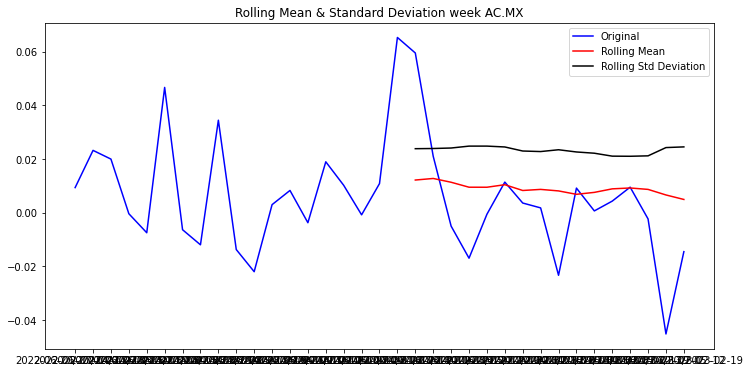

Test Statistic                 -3.932672
p-value                         0.001807
#Lags Used                      1.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


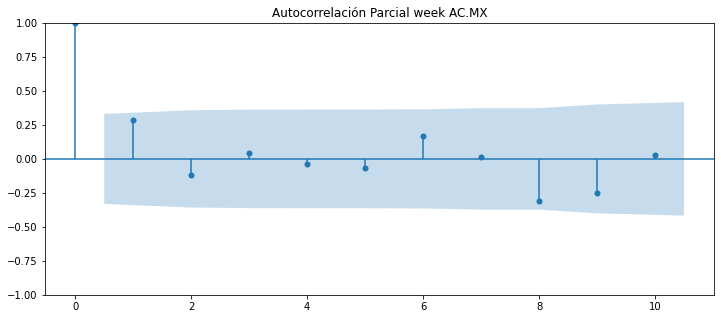

week ALPEKA.MX


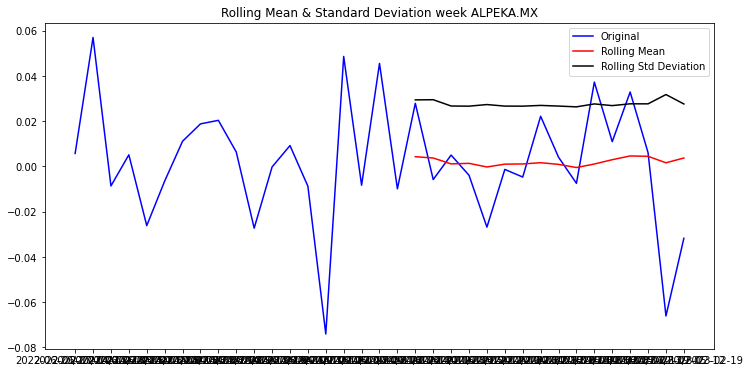

Test Statistic                 -3.572511
p-value                         0.006309
#Lags Used                      7.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


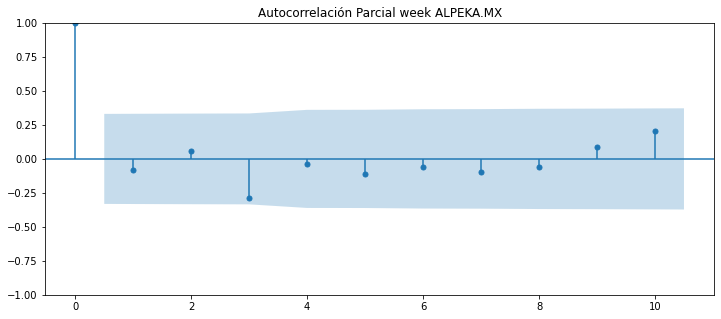

week ALSEA.MX


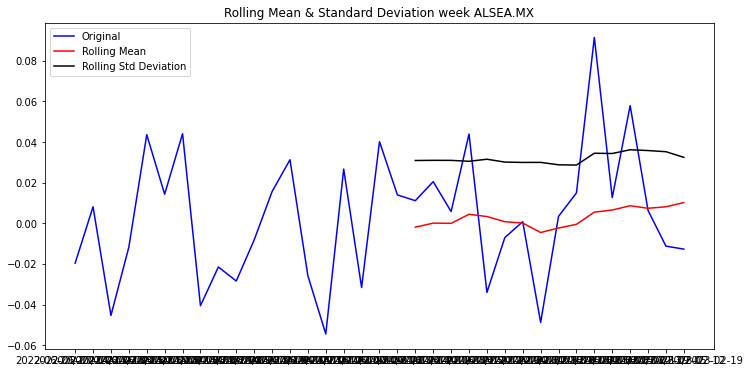

Test Statistic                 -5.489444
p-value                         0.000002
#Lags Used                      0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


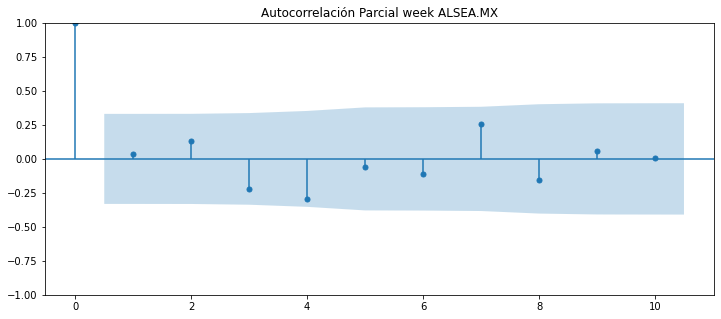

week AMXL.MX


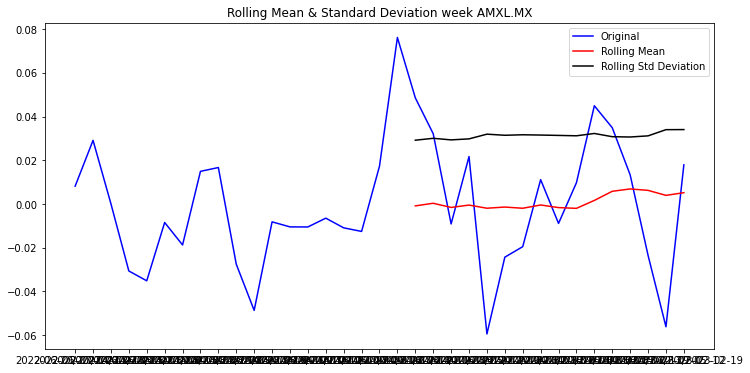

Test Statistic                 -3.661775
p-value                         0.004684
#Lags Used                      0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


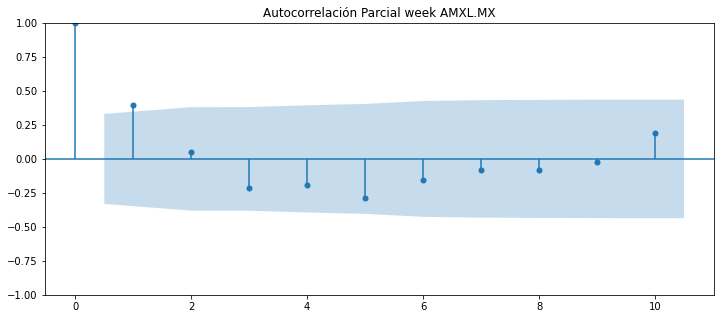

week ASURB.MX


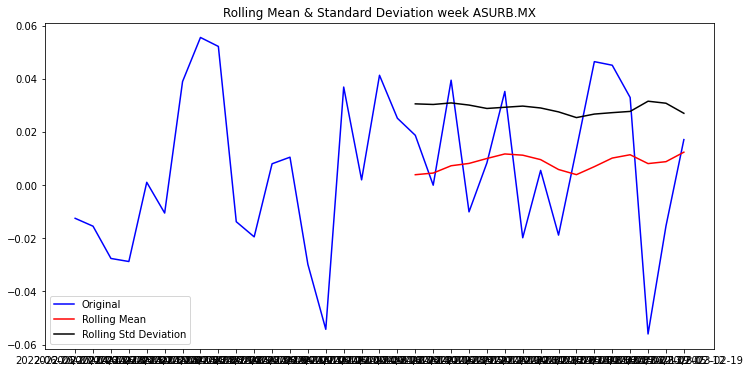

Test Statistic                 -4.476857
p-value                         0.000216
#Lags Used                      0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


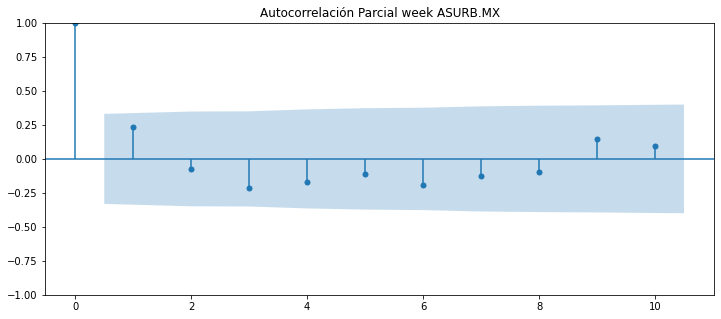

week BBAJIOO.MX


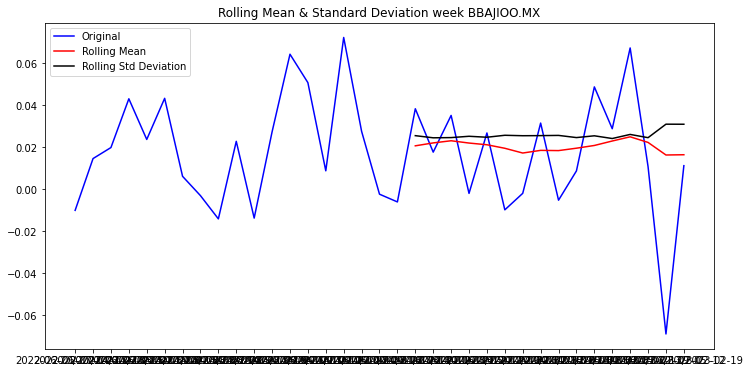

Test Statistic                 -5.165026
p-value                         0.000010
#Lags Used                      0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


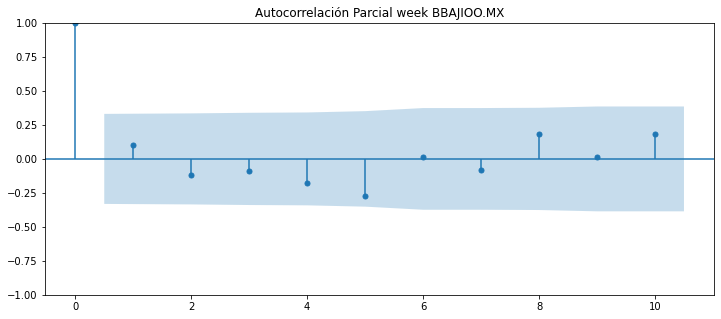

week BIMBOA.MX


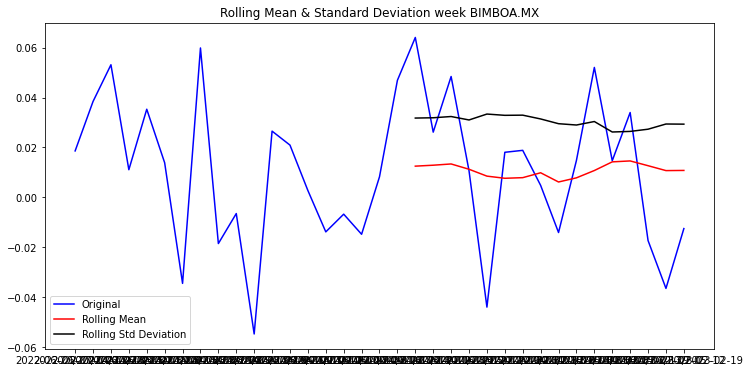

Test Statistic                 -4.807049
p-value                         0.000053
#Lags Used                      0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


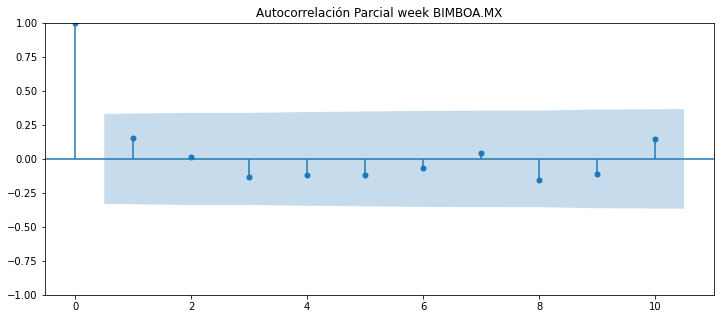

week BOLSAA.MX


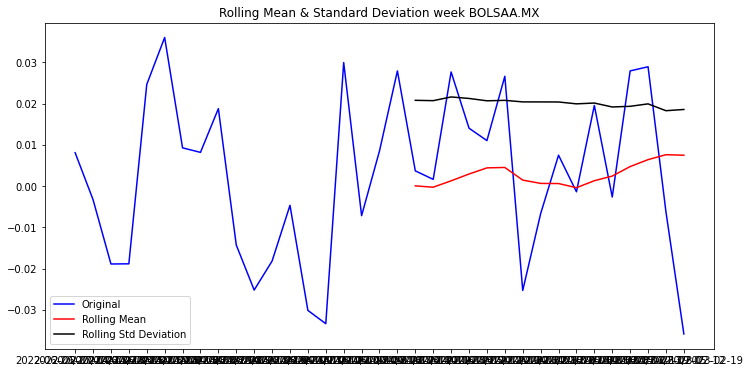

Test Statistic                 -4.174883
p-value                         0.000726
#Lags Used                      0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


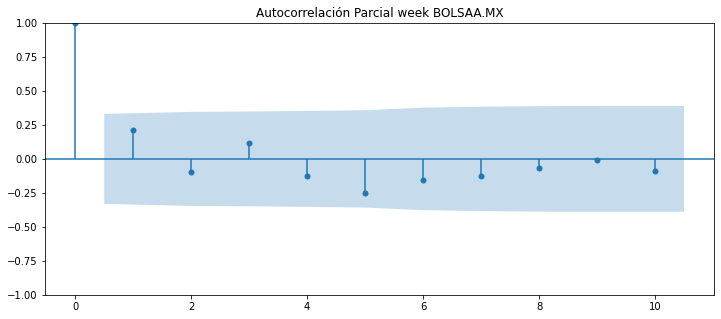

week CEMEXCPO.MX


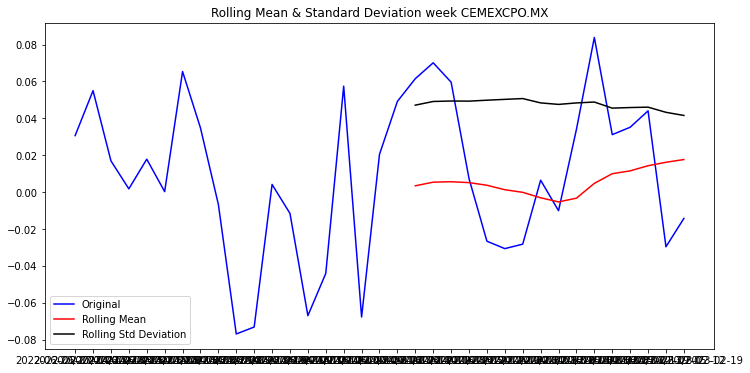

Test Statistic                 -3.737459
p-value                         0.003616
#Lags Used                      0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


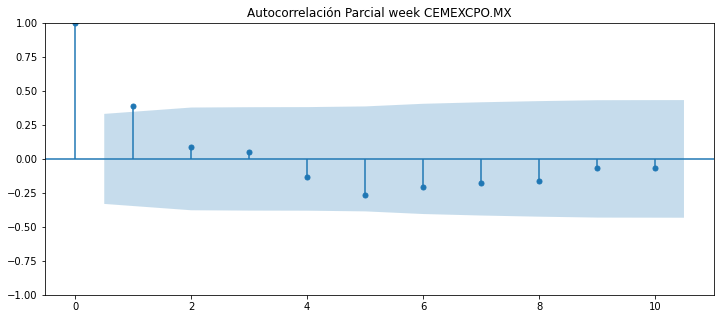

week CUERVO.MX


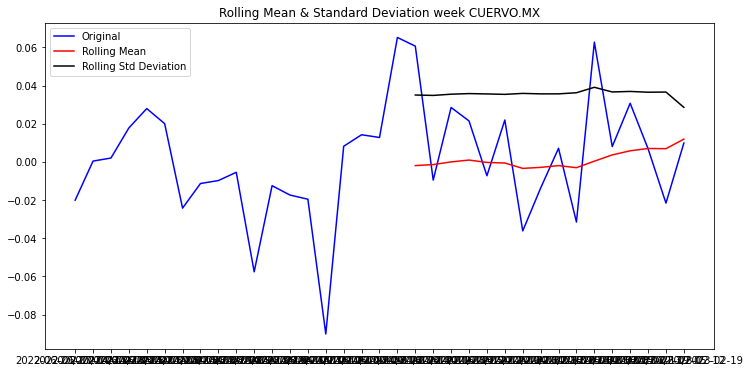

Test Statistic                 -4.722260
p-value                         0.000076
#Lags Used                      0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


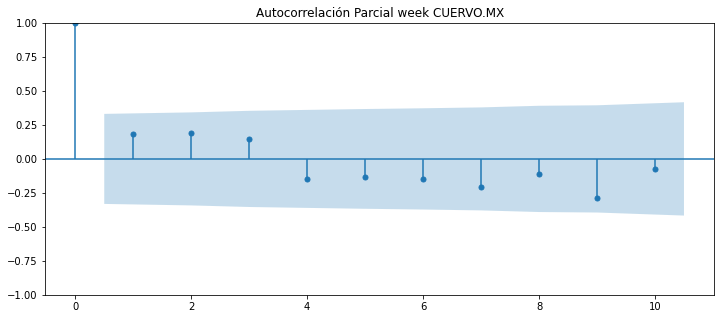

week FEMSAUBD.MX


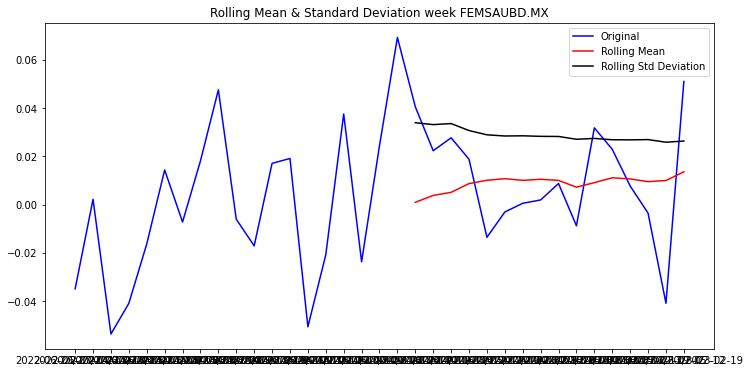

Test Statistic                 -3.647704
p-value                         0.004912
#Lags Used                      5.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


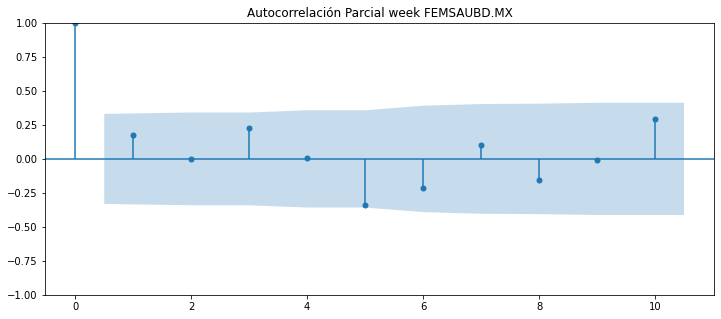

week GAPB.MX


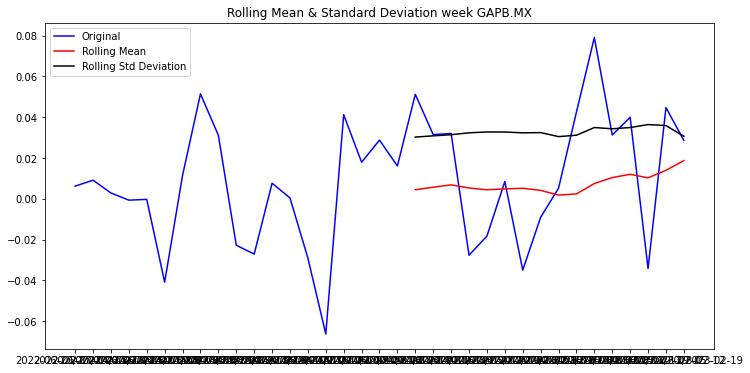

Test Statistic                 -4.347280
p-value                         0.000368
#Lags Used                      0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


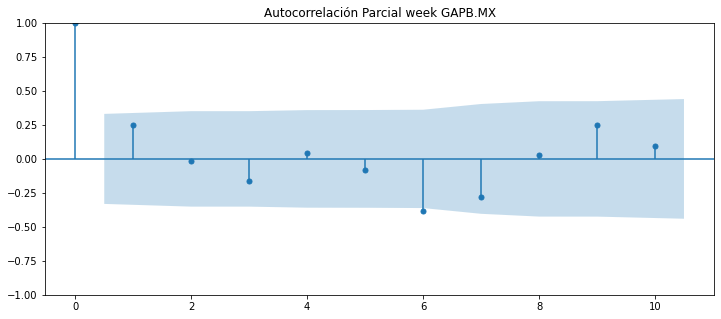

week GCARSOA1.MX


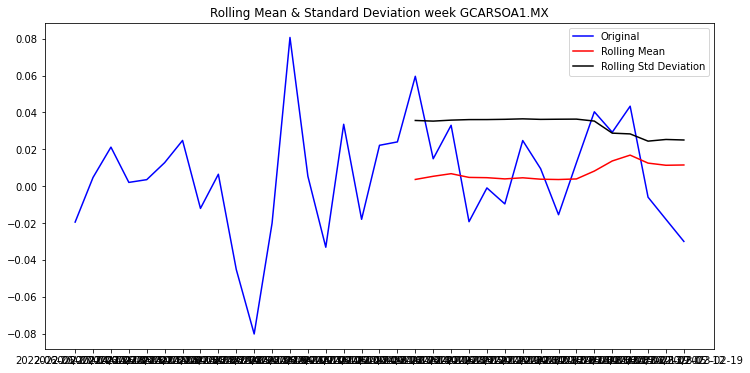

Test Statistic                 -4.592345
p-value                         0.000133
#Lags Used                      0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


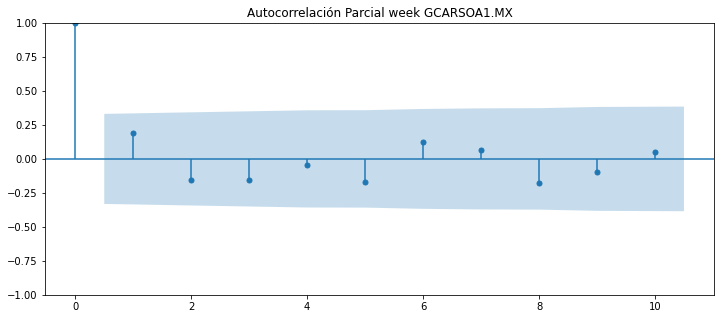

week GCC.MX


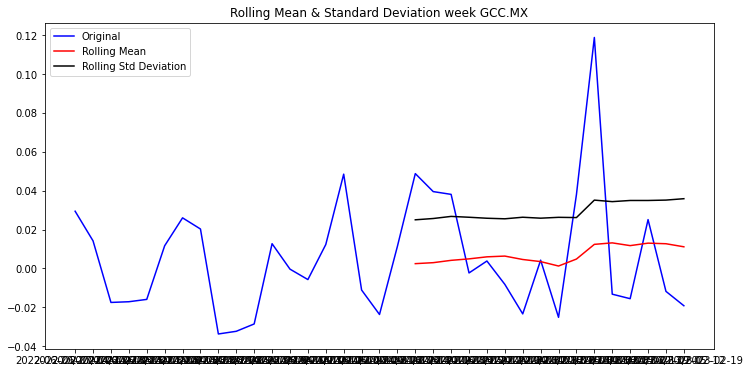

Test Statistic                 -4.843642
p-value                         0.000045
#Lags Used                      1.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


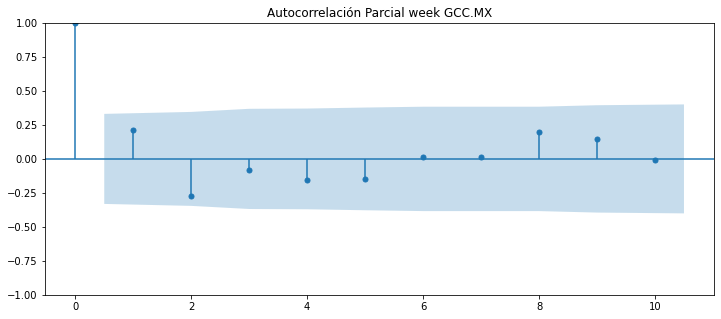

week GENTERA.MX


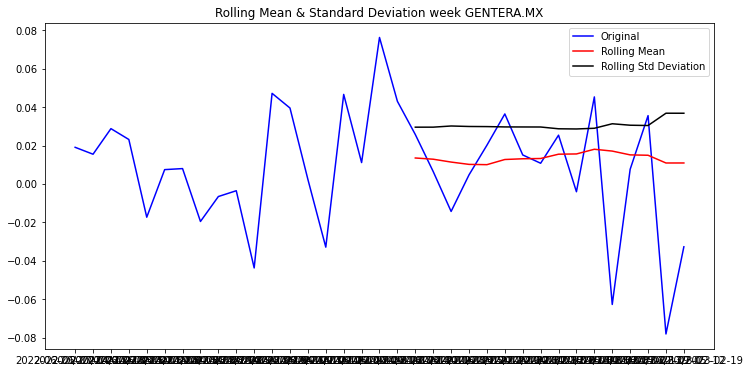

Test Statistic                 -5.383247
p-value                         0.000004
#Lags Used                      0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


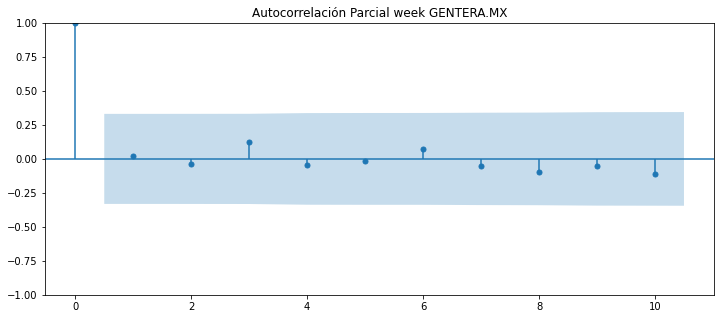

week GFNORTEO.MX


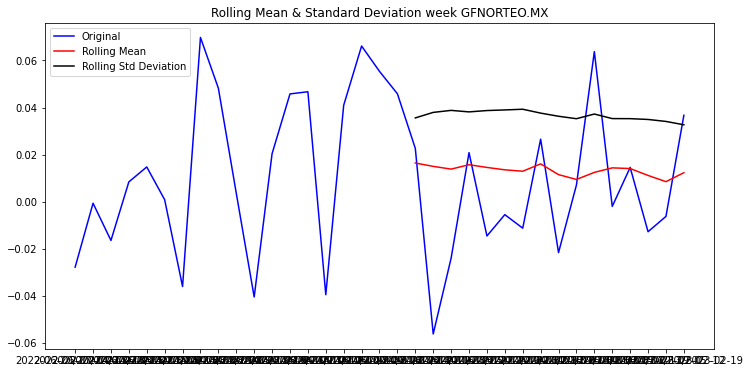

Test Statistic                 -5.041785
p-value                         0.000018
#Lags Used                      0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


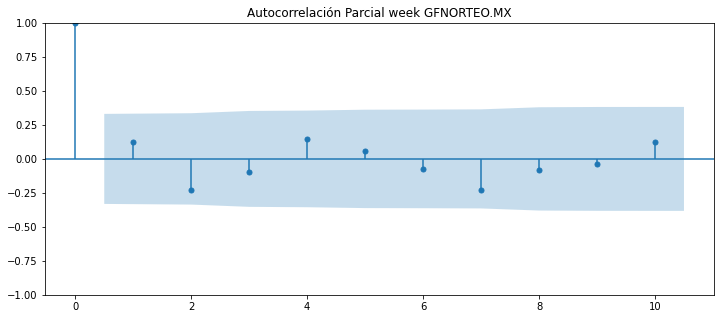

week GMEXICOB.MX


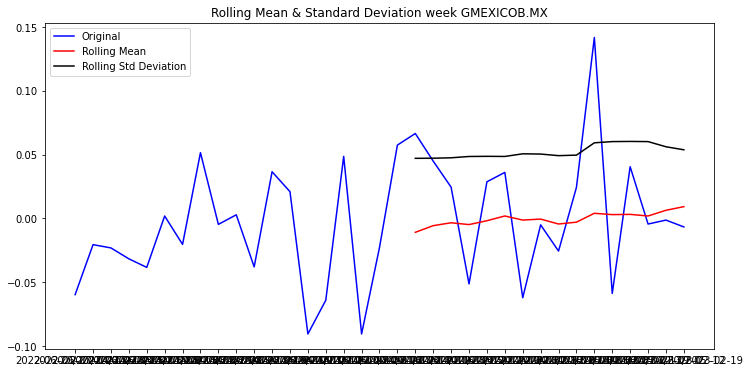

Test Statistic                -6.145962e+00
p-value                        7.766300e-08
#Lags Used                     0.000000e+00
Number of Observations Used    3.400000e+01
Critical Value (1%)           -3.639224e+00
Critical Value (5%)           -2.951230e+00
Critical Value (10%)          -2.614447e+00
dtype: float64


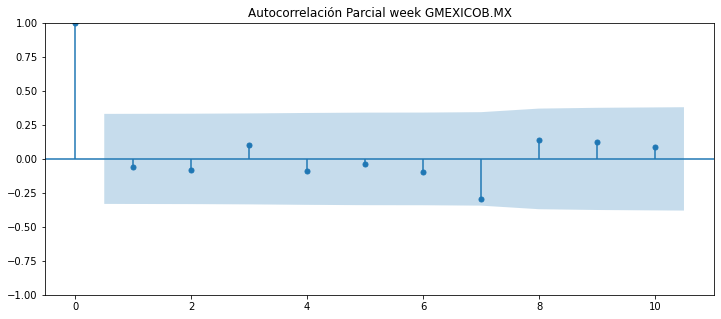

week GRUMAB.MX


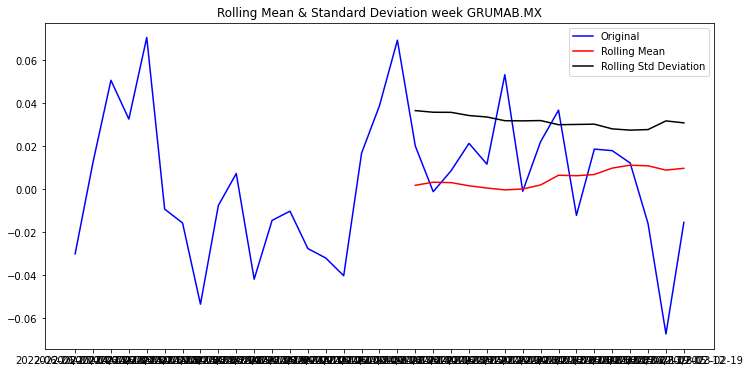

Test Statistic                 -3.705001
p-value                         0.004043
#Lags Used                      0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


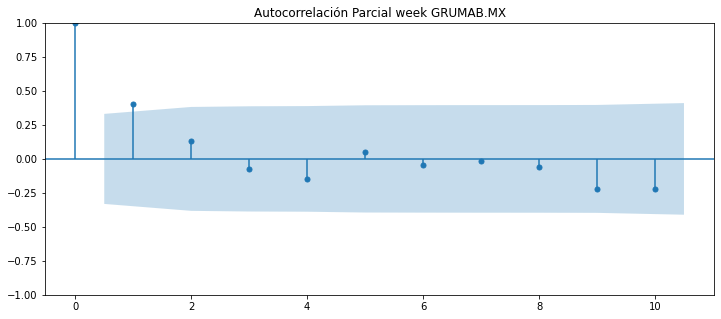

week IENOVA.MX


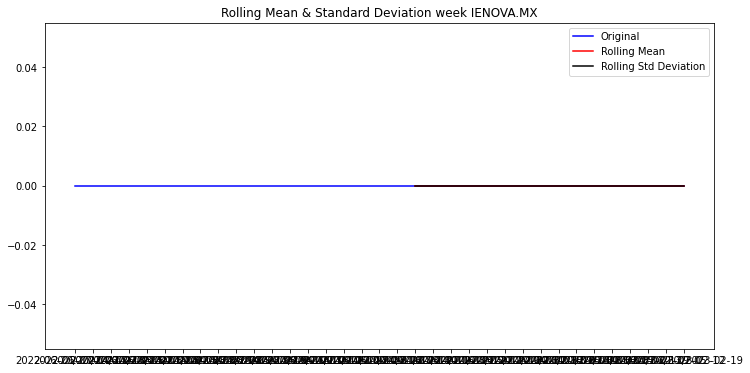

Test Statistic                       NaN
p-value                              NaN
#Lags Used                      0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


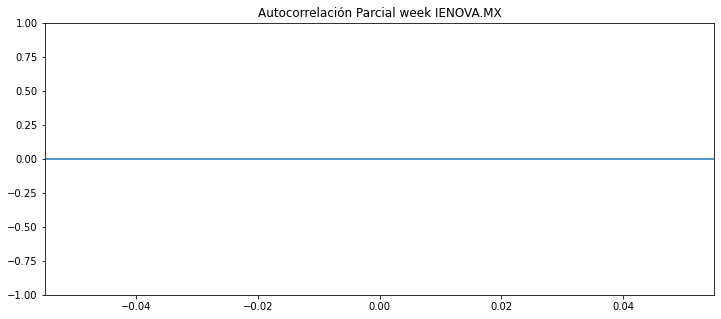

week KIMBERA.MX


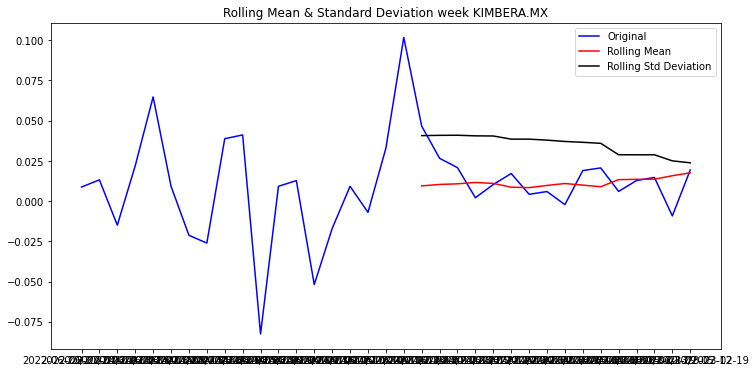

Test Statistic                 -2.592887
p-value                         0.094476
#Lags Used                      3.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


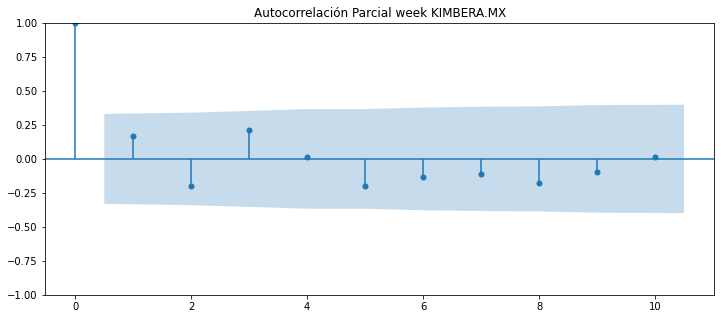

week LABB.MX


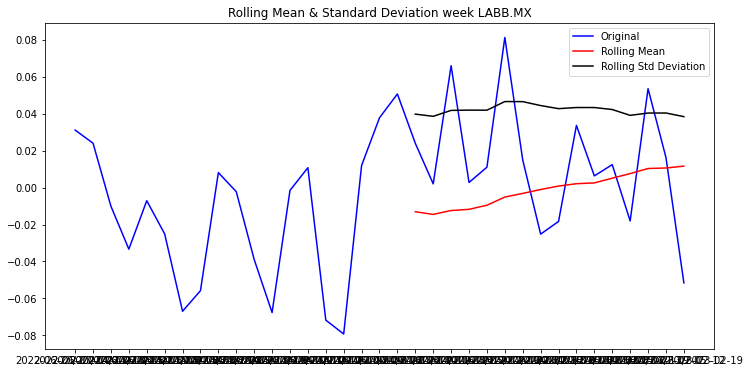

Test Statistic                 -2.140344
p-value                         0.228604
#Lags Used                      2.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


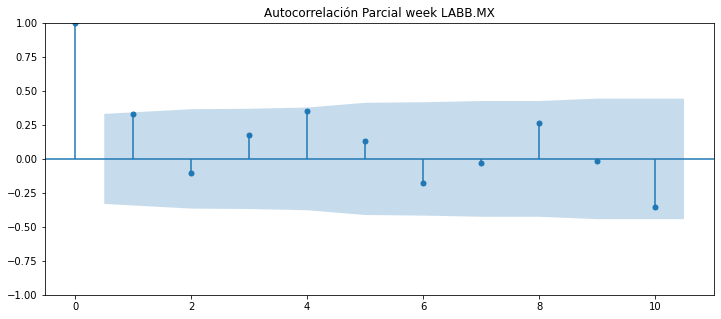

week MEGACPO.MX


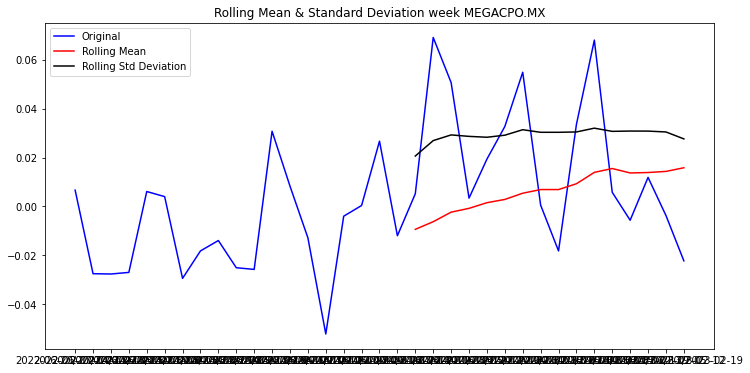

Test Statistic                 -1.586135
p-value                         0.490555
#Lags Used                      3.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


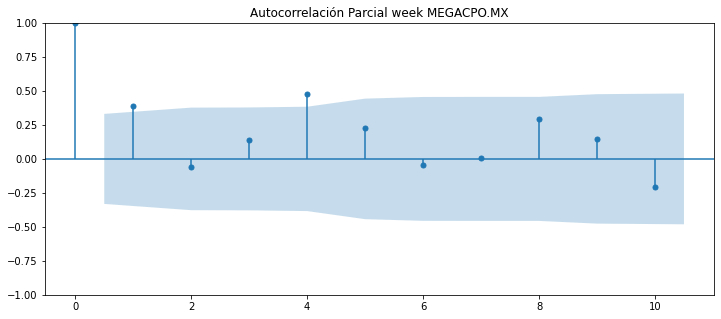

week OMAB.MX


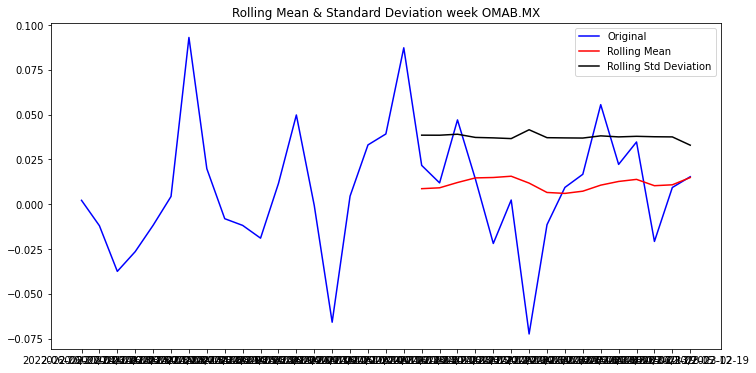

Test Statistic                 -3.943236
p-value                         0.001739
#Lags Used                      7.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


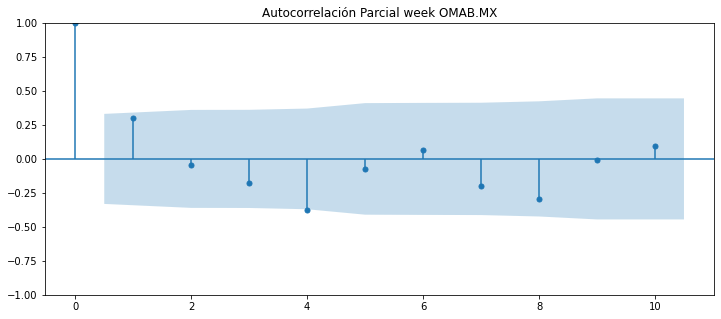

week PINFRA.MX


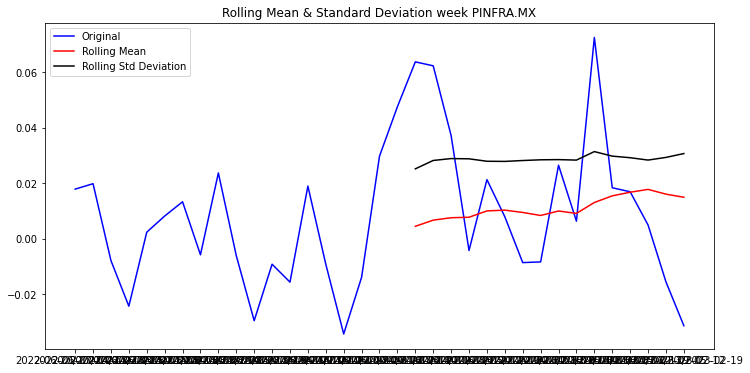

Test Statistic                 -3.114587
p-value                         0.025492
#Lags Used                      0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


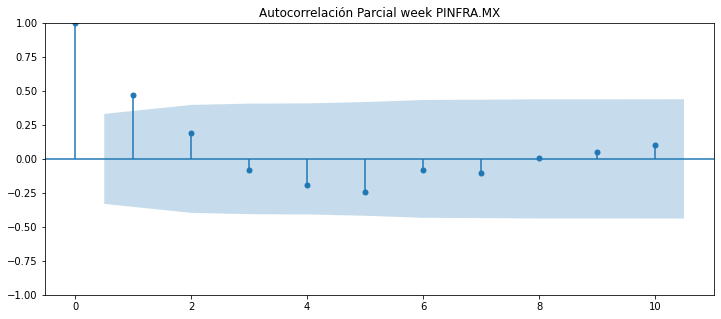

week TLEVISACPO.MX


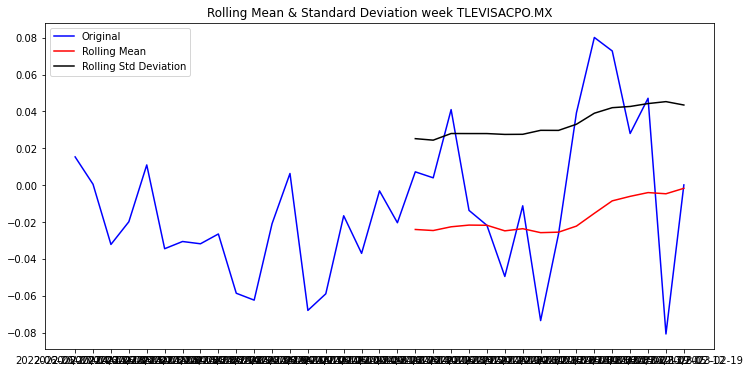

Test Statistic                 -3.764183
p-value                         0.003296
#Lags Used                      0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


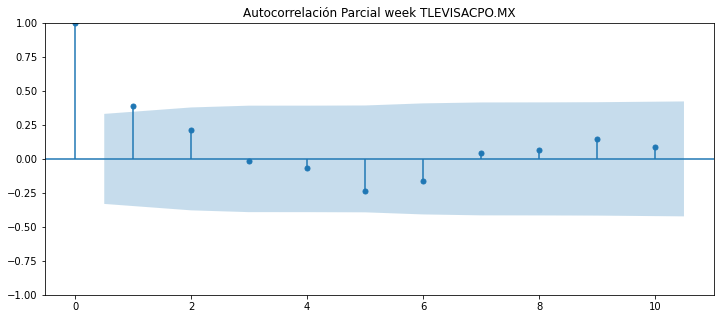

In [24]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for u in range(len(udiffINPC.columns)):
    plt.figure(figsize=(12, 6))
    item=udiffINPC.columns.__getitem__(u)
    print(item)
    orig = plt.plot(udiffINPC[item], color='blue', label='Original')
    mean = plt.plot(rolmeanINPC[item], color='red', label='Rolling Mean')
    std = plt.plot(rolstdINPC[item], color='black', label = 'Rolling Std Deviation')
    jo='Rolling Mean & Standard Deviation {}'.format(item)
    plt.title(jo)
    plt.legend(loc='best')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test
    dftest = sm.tsa.adfuller(udiffINPC[item], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({0})'.format(key)] = value
    
    print(dfoutput)
    
    # the autocorrelation chart provides just the correlation at increasing lags
    fig, ax = plt.subplots(figsize=(12,5))
    plot_acf(udiffINPC[item].values, lags=10, ax=ax)
    jo='Autocorrelación Parcial {}'.format(item)
    plt.title(jo)
    plt.show()

# MODELO ARIMA

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  87.459
Date:                Fri, 17 Feb 2023   AIC                           -162.917
Time:                        23:36:54   BIC                           -153.585
Sample:                             0   HQIC                          -159.696
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0057      0.005      1.082      0.279      -0.005       0.016
ar.L1          0.0093      0.784      0.012      0.991      -1.527       1.546
ar.L2         -0.1646      0.398     -0.414      0.6

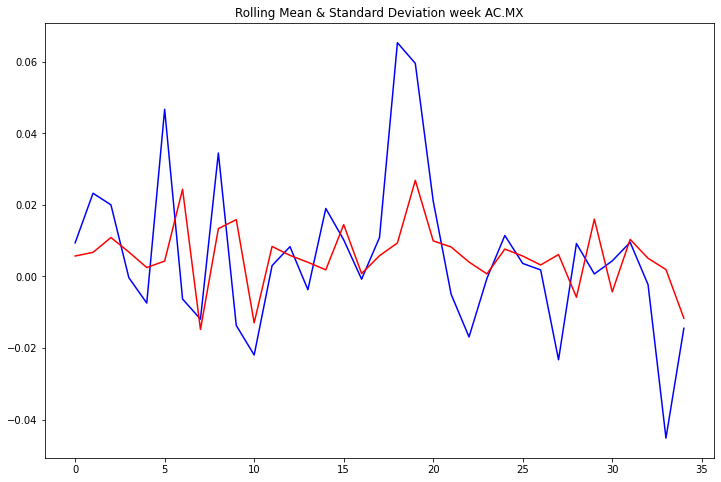

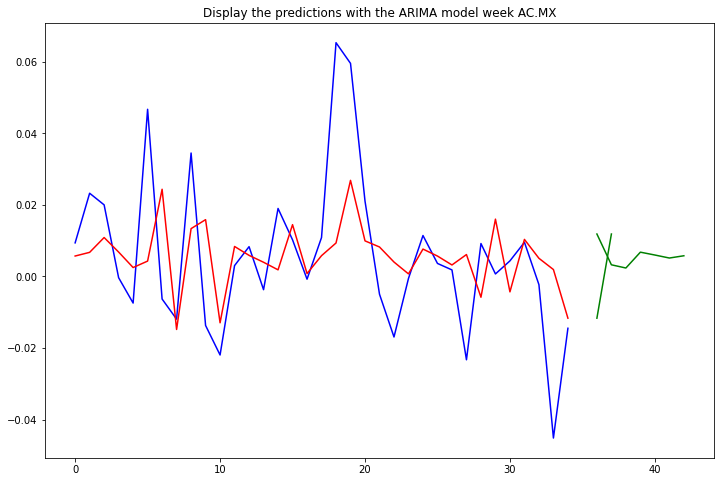

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  82.230
Date:                Fri, 17 Feb 2023   AIC                           -152.460
Time:                        23:36:55   BIC                           -143.128
Sample:                             0   HQIC                          -149.239
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.001      2.934      0.003       0.001       0.003
ar.L1          0.6218      0.225      2.758      0.006       0.180       1.064
ar.L2          0.0472      0.266      0.178      0.8

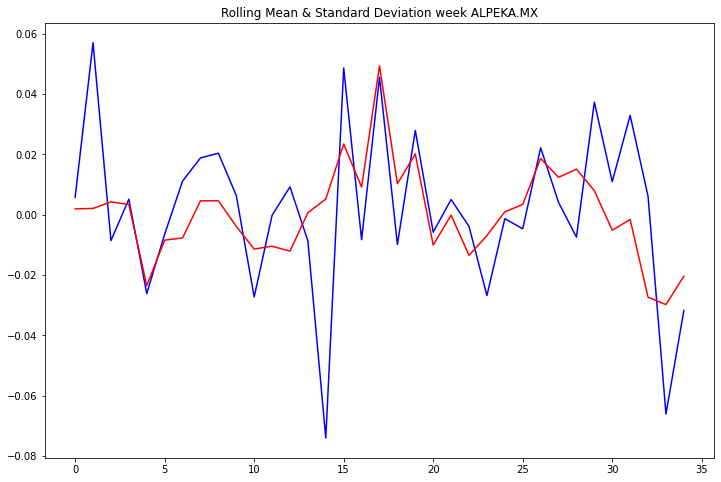

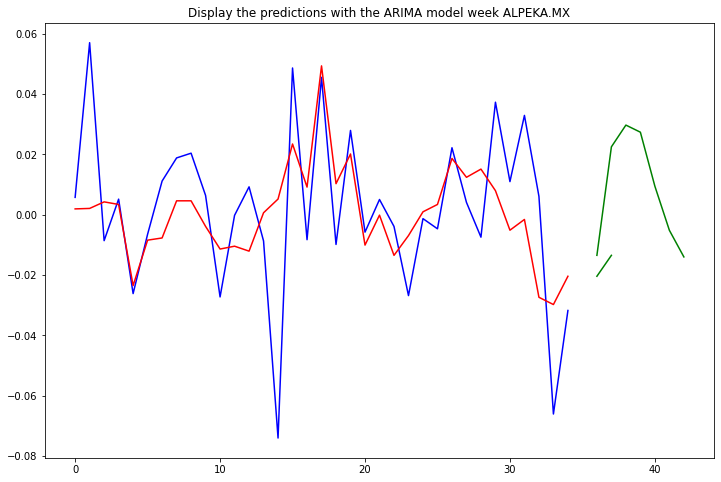

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  73.226
Date:                Fri, 17 Feb 2023   AIC                           -134.452
Time:                        23:36:56   BIC                           -125.120
Sample:                             0   HQIC                          -131.230
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.004      0.889      0.374      -0.004       0.010
ar.L1          0.6383      0.453      1.409      0.159      -0.250       1.526
ar.L2          0.1257      0.223      0.563      0.5

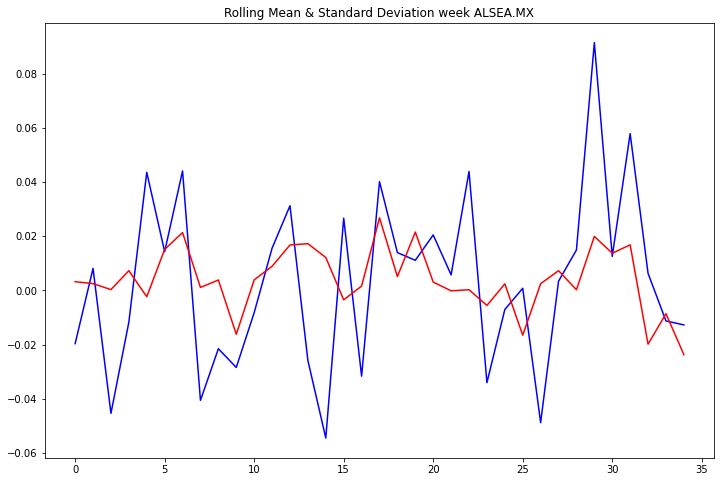

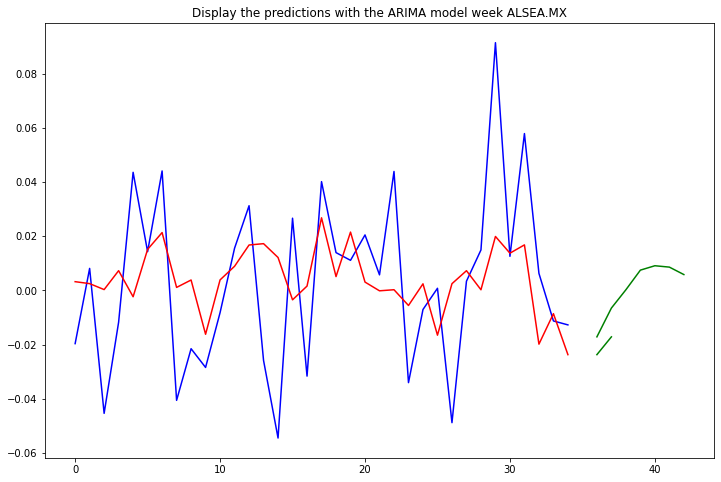

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  78.650
Date:                Fri, 17 Feb 2023   AIC                           -145.300
Time:                        23:36:57   BIC                           -135.968
Sample:                             0   HQIC                          -142.079
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.006     -0.082      0.935      -0.013       0.012
ar.L1         -0.1016      0.557     -0.182      0.855      -1.194       0.990
ar.L2          0.2070      0.325      0.637      0.5

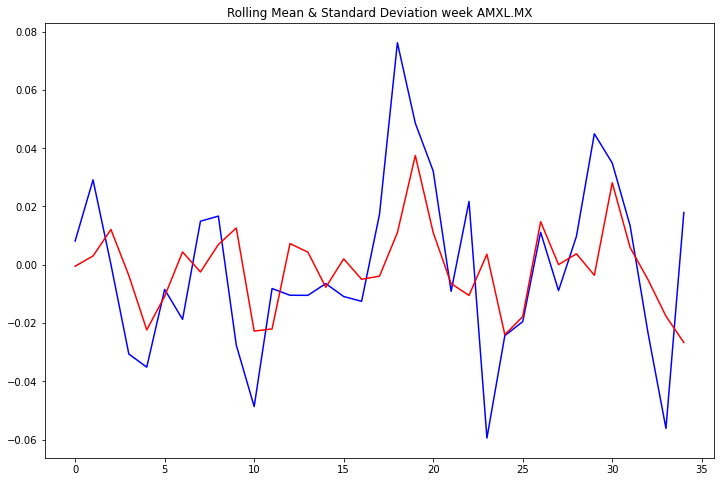

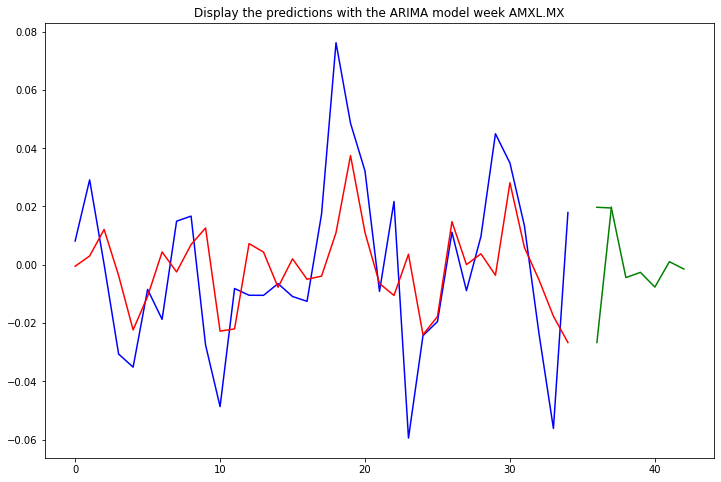

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  77.256
Date:                Fri, 17 Feb 2023   AIC                           -142.511
Time:                        23:36:58   BIC                           -133.179
Sample:                             0   HQIC                          -139.290
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0079      0.003      2.665      0.008       0.002       0.014
ar.L1          0.9681      0.415      2.334      0.020       0.155       1.781
ar.L2         -0.3724      0.332     -1.123      0.2

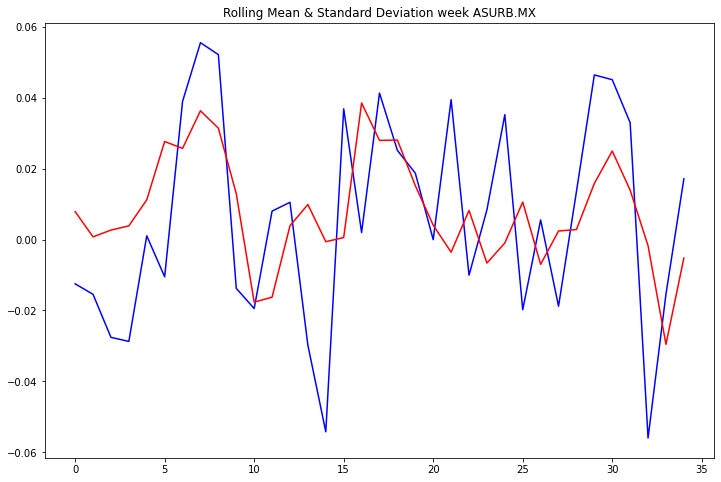

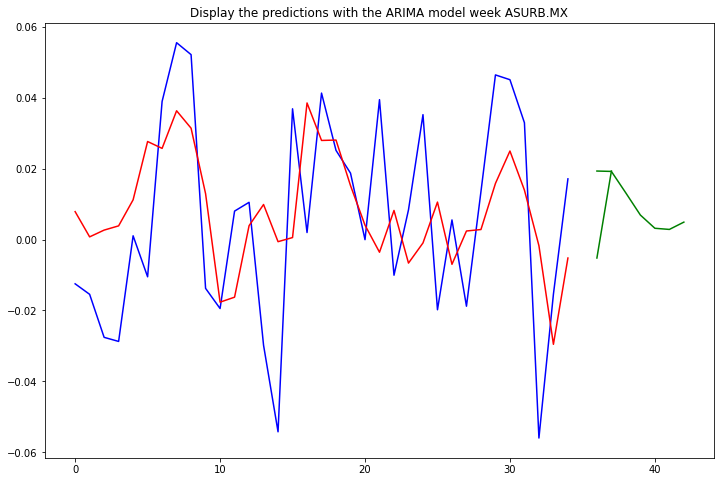

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  78.626
Date:                Fri, 17 Feb 2023   AIC                           -145.251
Time:                        23:36:59   BIC                           -135.919
Sample:                             0   HQIC                          -142.030
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0194      0.002     12.213      0.000       0.016       0.022
ar.L1          0.9509      0.448      2.120      0.034       0.072       1.830
ar.L2         -0.3561      0.371     -0.959      0.3

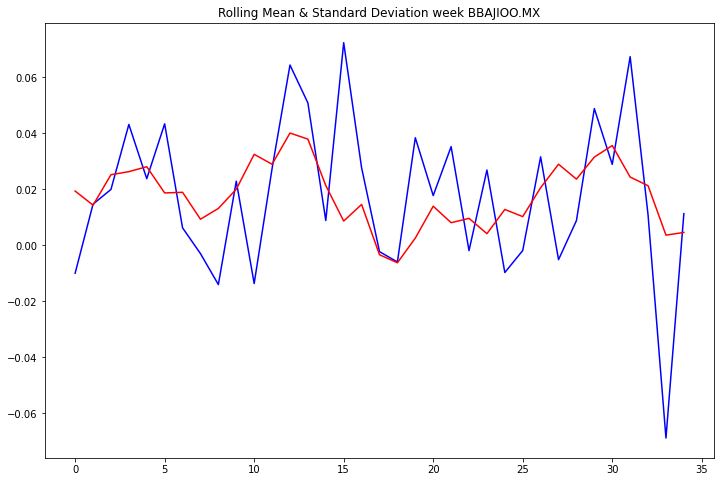

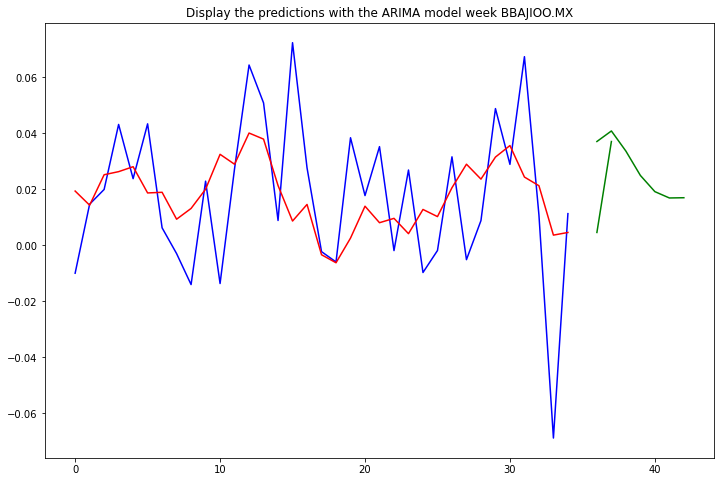

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  75.624
Date:                Fri, 17 Feb 2023   AIC                           -139.248
Time:                        23:37:00   BIC                           -129.916
Sample:                             0   HQIC                          -136.027
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0103      0.002      4.816      0.000       0.006       0.014
ar.L1          1.0044      0.262      3.841      0.000       0.492       1.517
ar.L2         -0.1779      0.285     -0.625      0.5

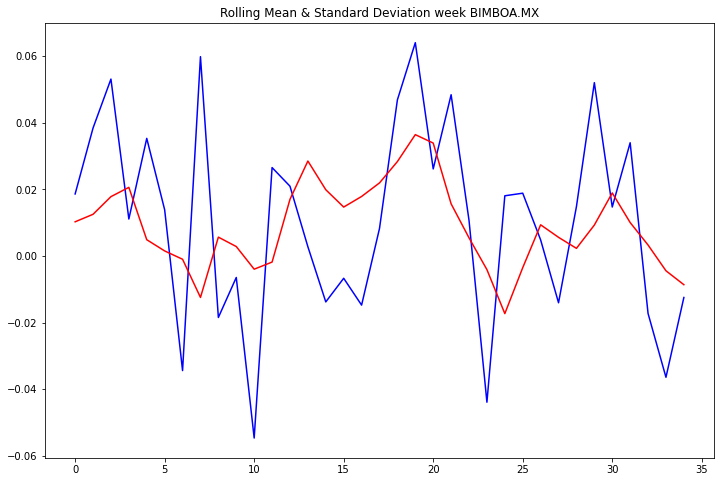

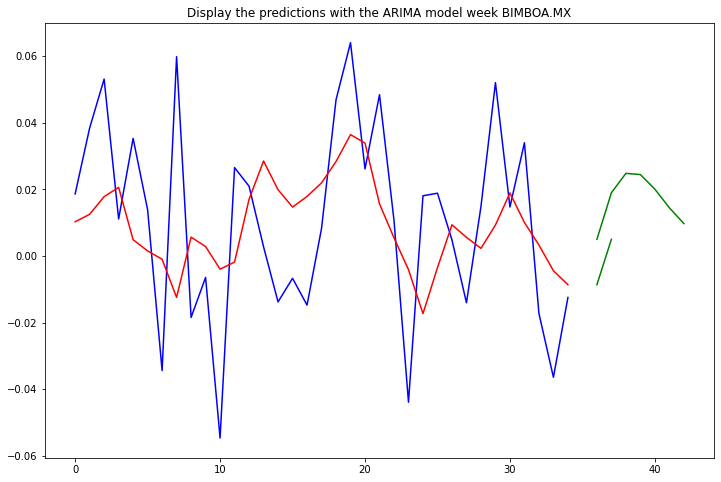

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  90.311
Date:                Fri, 17 Feb 2023   AIC                           -168.623
Time:                        23:37:01   BIC                           -159.291
Sample:                             0   HQIC                          -165.401
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0025      0.004      0.573      0.566      -0.006       0.011
ar.L1         -0.4867      0.317     -1.535      0.125      -1.108       0.135
ar.L2          0.0084      0.304      0.028      0.9

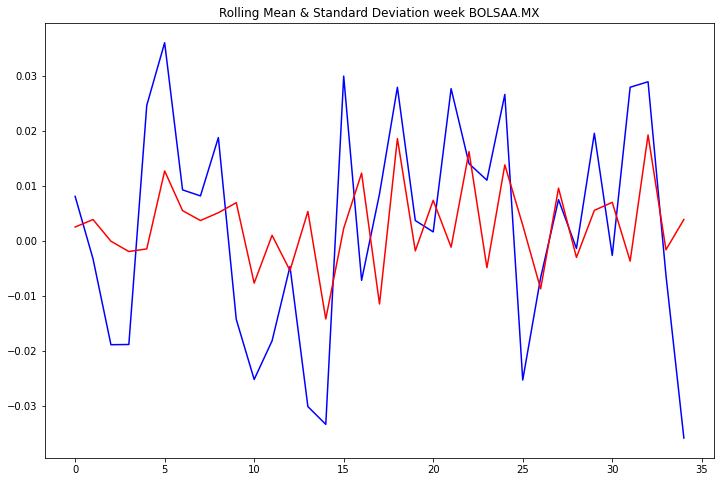

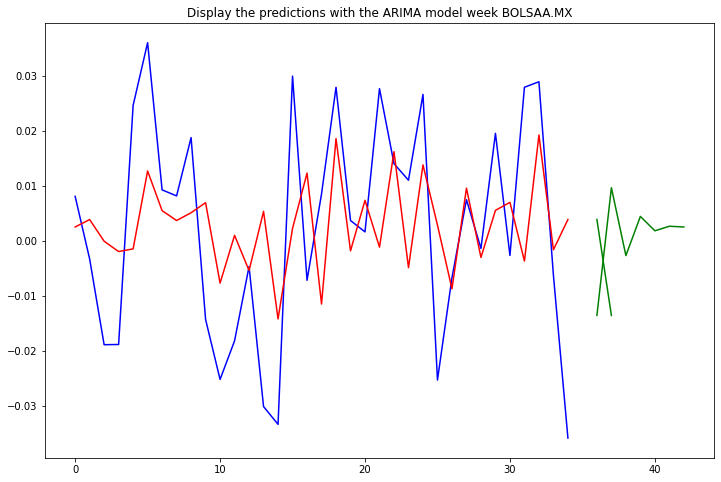

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  63.565
Date:                Fri, 17 Feb 2023   AIC                           -115.130
Time:                        23:37:02   BIC                           -105.797
Sample:                             0   HQIC                          -111.908
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0087      0.012      0.741      0.459      -0.014       0.032
ar.L1         -0.0825      1.576     -0.052      0.958      -3.172       3.007
ar.L2          0.1084      0.681      0.159      0.8

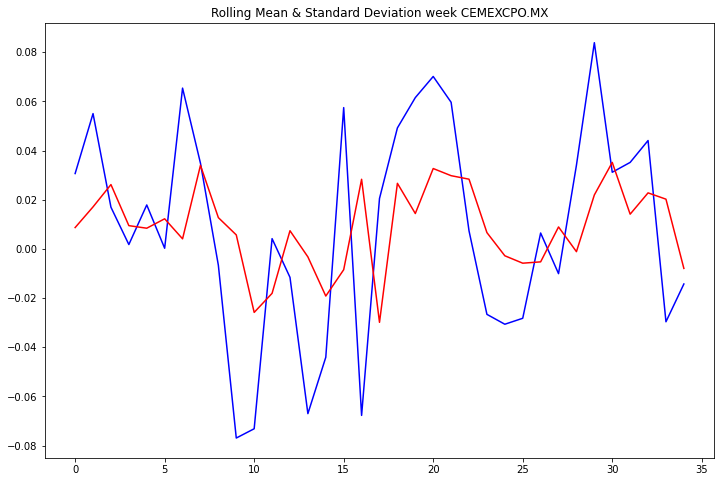

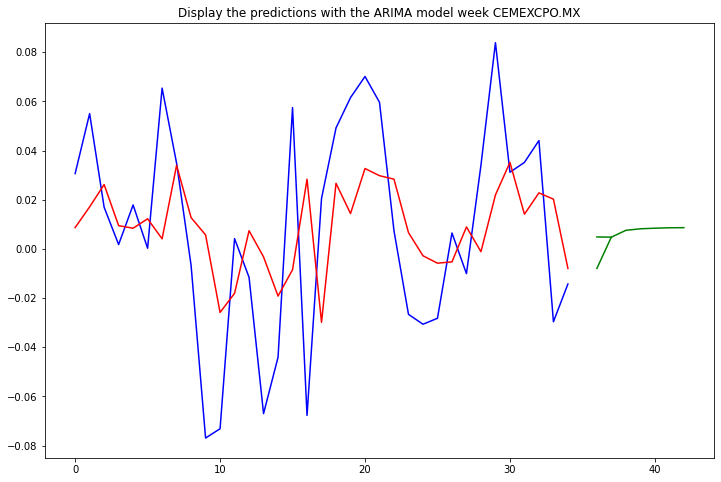

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  73.522
Date:                Fri, 17 Feb 2023   AIC                           -135.044
Time:                        23:37:02   BIC                           -125.712
Sample:                             0   HQIC                          -131.822
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.009      0.065      0.948      -0.017       0.018
ar.L1         -0.3225      0.933     -0.345      0.730      -2.152       1.507
ar.L2          0.2062      0.290      0.712      0.4

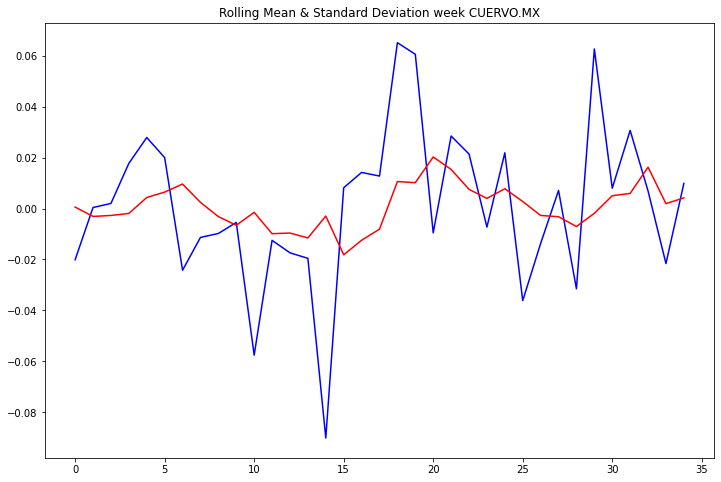

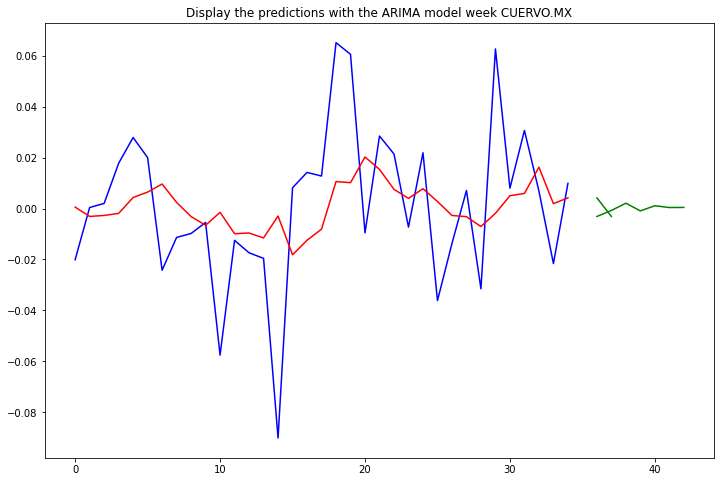

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  77.174
Date:                Fri, 17 Feb 2023   AIC                           -142.347
Time:                        23:37:03   BIC                           -133.015
Sample:                             0   HQIC                          -139.126
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0030      0.008      0.379      0.704      -0.013       0.019
ar.L1          0.0944      0.461      0.205      0.838      -0.809       0.998
ar.L2         -0.1579      0.200     -0.788      0.4

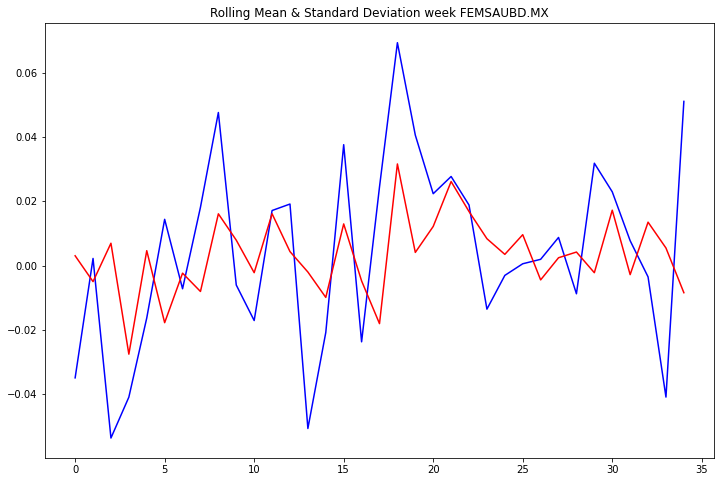

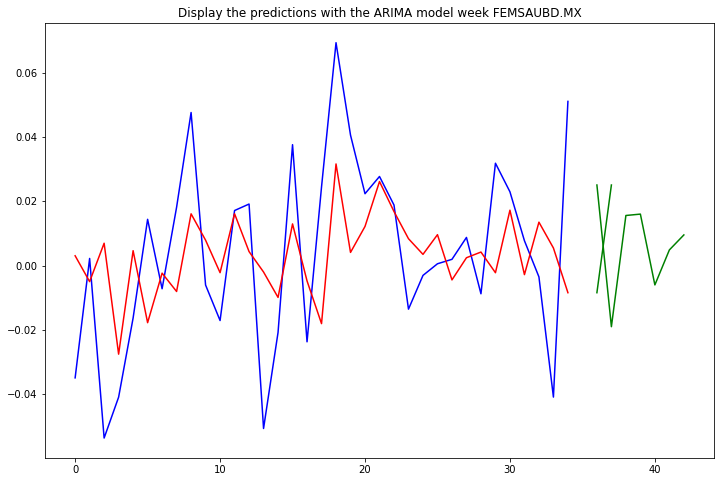

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  73.507
Date:                Fri, 17 Feb 2023   AIC                           -135.015
Time:                        23:37:04   BIC                           -125.683
Sample:                             0   HQIC                          -131.793
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0089      0.006      1.577      0.115      -0.002       0.020
ar.L1         -0.1560      0.742     -0.210      0.833      -1.609       1.297
ar.L2          0.0922      0.273      0.338      0.7

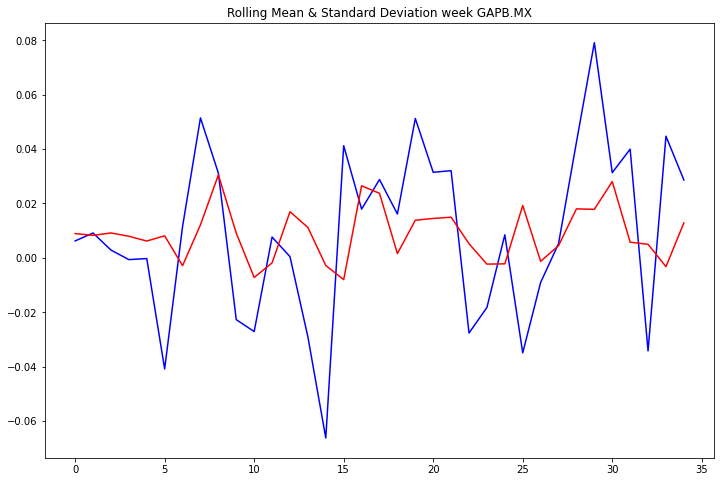

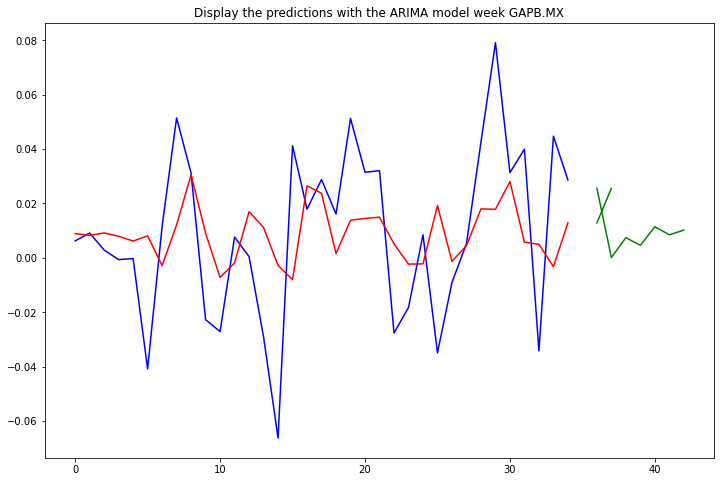

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  74.268
Date:                Fri, 17 Feb 2023   AIC                           -136.536
Time:                        23:37:04   BIC                           -127.204
Sample:                             0   HQIC                          -133.315
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0054      0.005      1.049      0.294      -0.005       0.016
ar.L1          0.0980      2.021      0.048      0.961      -3.864       4.060
ar.L2         -0.1514      0.478     -0.317      0.7

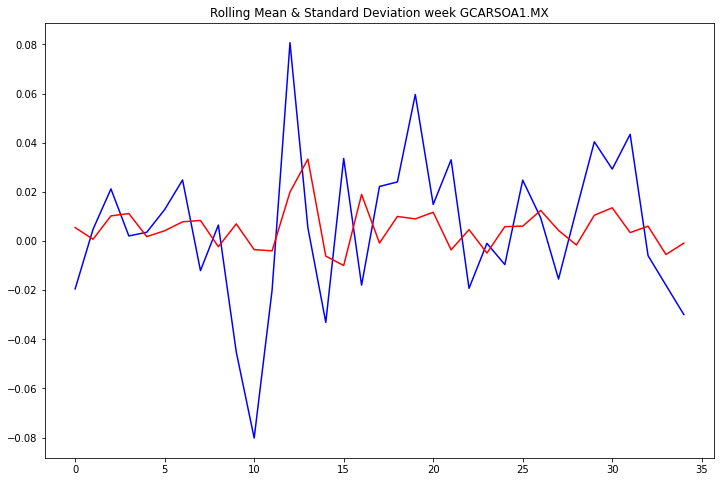

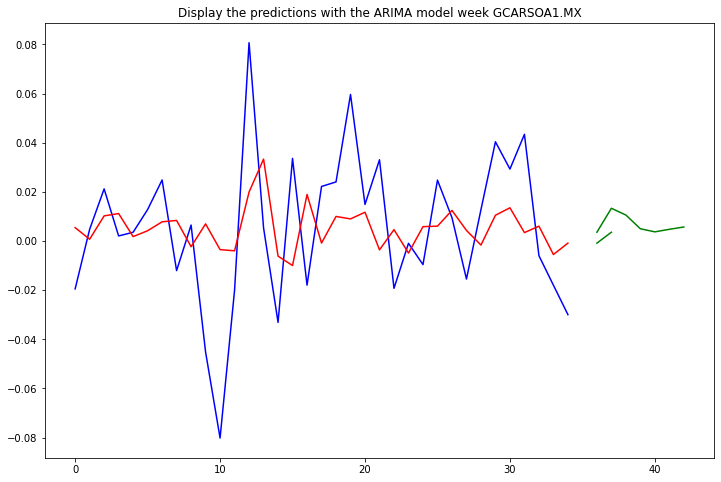

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  75.936
Date:                Fri, 17 Feb 2023   AIC                           -139.871
Time:                        23:37:05   BIC                           -130.539
Sample:                             0   HQIC                          -136.650
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0057      0.006      0.938      0.348      -0.006       0.018
ar.L1         -0.1915      1.058     -0.181      0.856      -2.265       1.882
ar.L2         -0.2230      0.380     -0.586      0.5

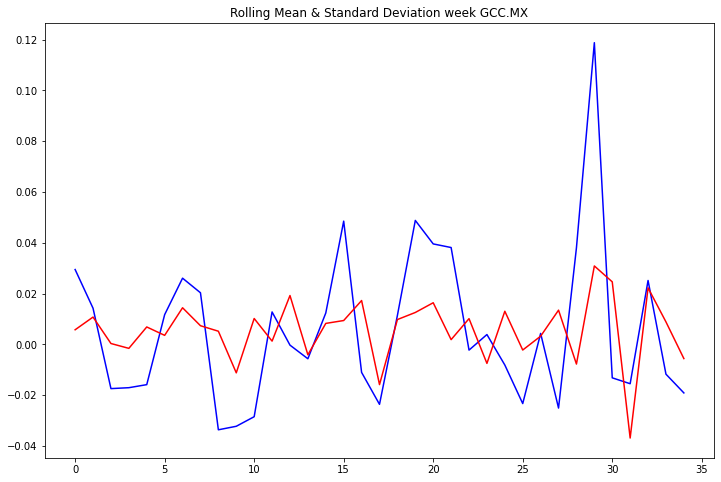

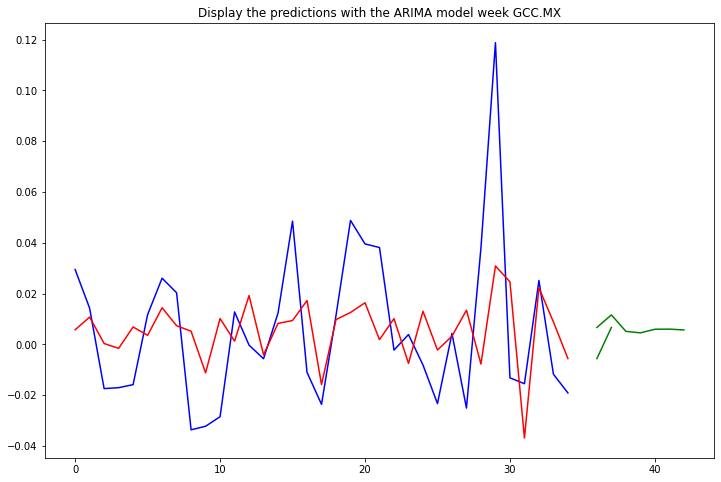

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  71.457
Date:                Fri, 17 Feb 2023   AIC                           -130.914
Time:                        23:37:06   BIC                           -121.582
Sample:                             0   HQIC                          -127.693
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0080      0.007      1.097      0.273      -0.006       0.022
ar.L1         -0.1584      1.200     -0.132      0.895      -2.510       2.194
ar.L2         -0.0319      0.260     -0.123      0.9

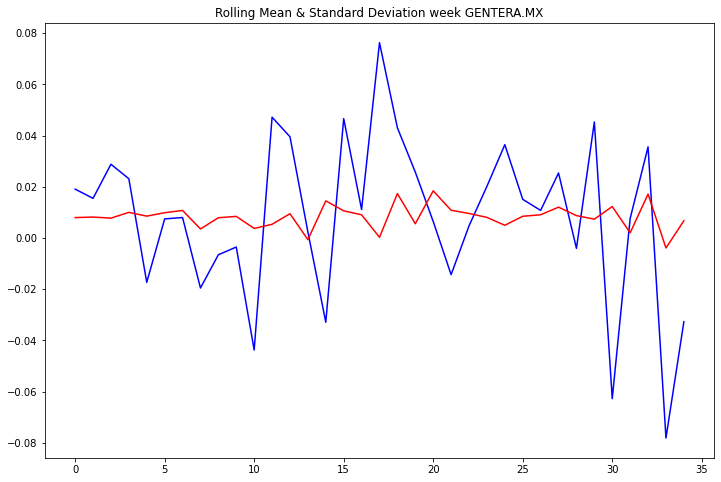

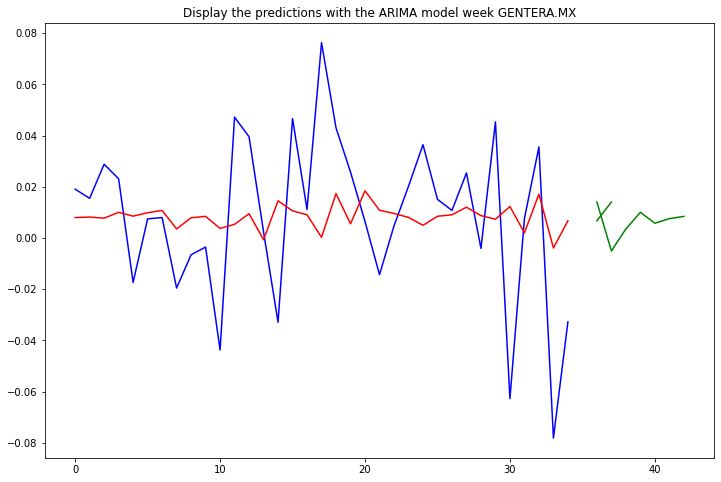

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  71.792
Date:                Fri, 17 Feb 2023   AIC                           -131.584
Time:                        23:37:07   BIC                           -122.252
Sample:                             0   HQIC                          -128.363
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0103      0.005      2.036      0.042       0.000       0.020
ar.L1         -0.7406      0.259     -2.865      0.004      -1.247      -0.234
ar.L2         -0.1048      0.237     -0.442      0.6

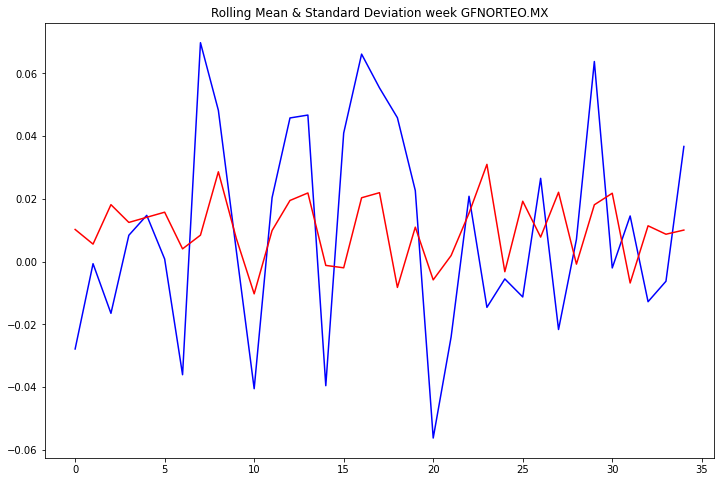

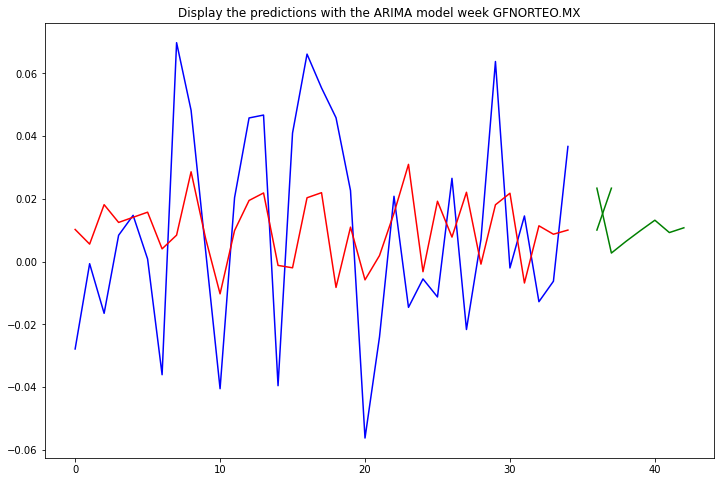

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  56.721
Date:                Fri, 17 Feb 2023   AIC                           -101.442
Time:                        23:37:08   BIC                            -92.110
Sample:                             0   HQIC                           -98.220
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0027      0.009     -0.305      0.761      -0.020       0.014
ar.L1         -0.4154      1.938     -0.214      0.830      -4.213       3.382
ar.L2         -0.0988      0.236     -0.419      0.6

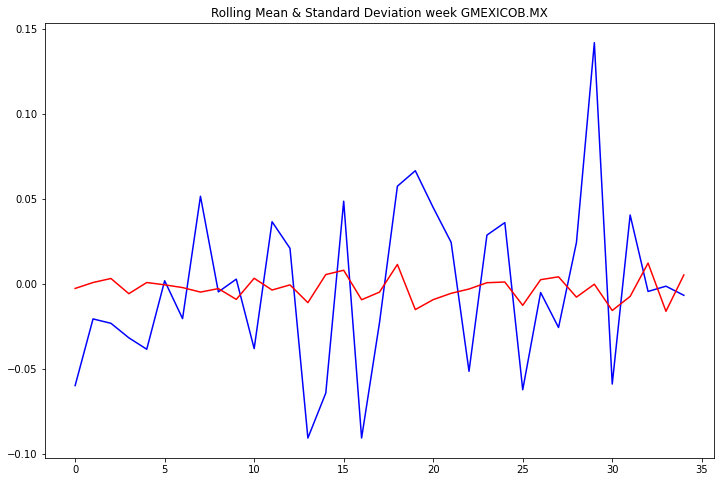

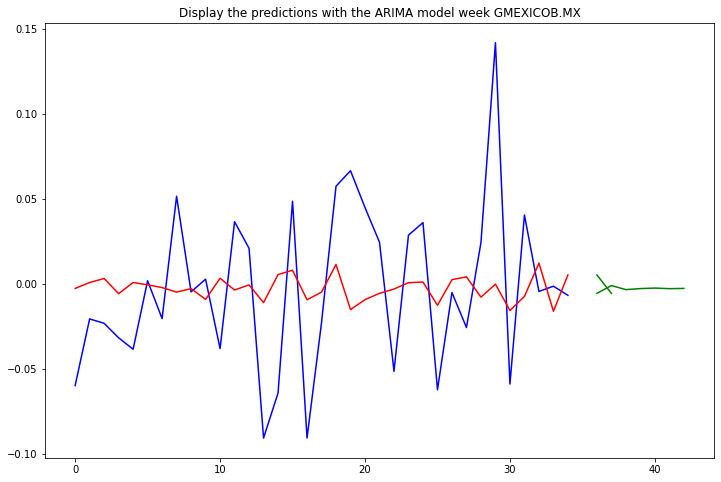

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  74.415
Date:                Fri, 17 Feb 2023   AIC                           -136.829
Time:                        23:37:09   BIC                           -127.497
Sample:                             0   HQIC                          -133.608
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.007      0.460      0.645      -0.010       0.017
ar.L1          0.6270      1.290      0.486      0.627      -1.902       3.156
ar.L2         -0.0428      0.637     -0.067      0.9

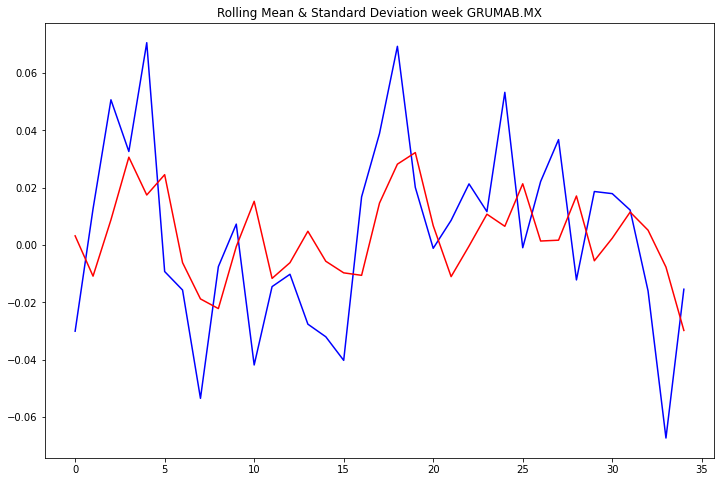

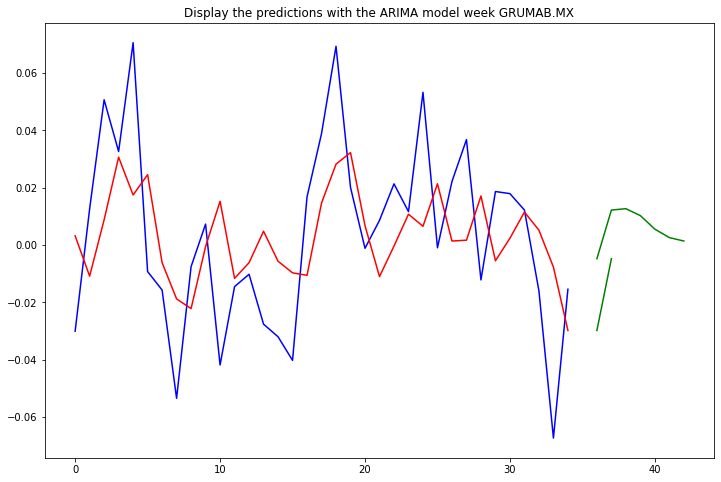

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 372.329
Date:                Fri, 17 Feb 2023   AIC                           -732.657
Time:                        23:37:11   BIC                           -723.325
Sample:                             0   HQIC                          -729.436
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.825e-06   2.76e-13  -1.75e+07      0.000   -4.82e-06   -4.82e-06
ar.L1       1.378e-17   1.29e-18     10.667      0.000    1.12e-17    1.63e-17
ar.L2       2.758e-17   1.25e-18     21.994      0.0

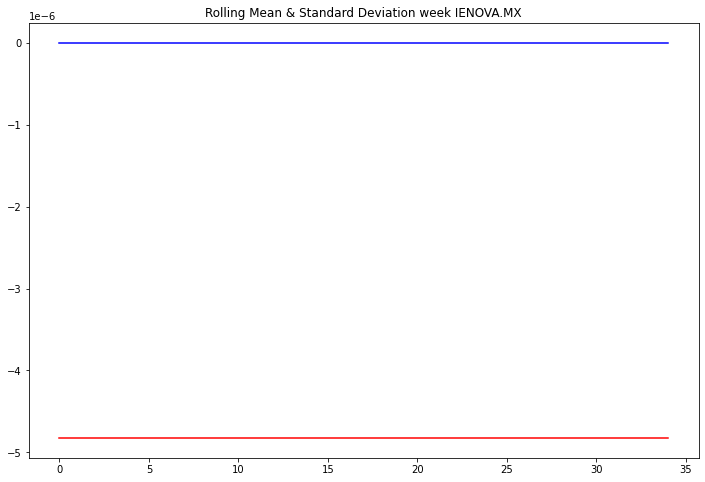

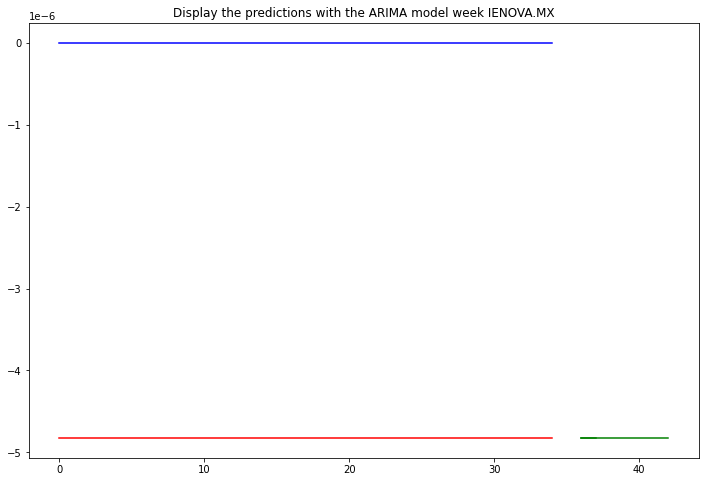

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  76.549
Date:                Fri, 17 Feb 2023   AIC                           -141.097
Time:                        23:37:12   BIC                           -131.765
Sample:                             0   HQIC                          -137.876
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0104      0.006      1.722      0.085      -0.001       0.022
ar.L1         -0.3688      0.334     -1.105      0.269      -1.023       0.286
ar.L2         -0.1615      0.169     -0.955      0.3

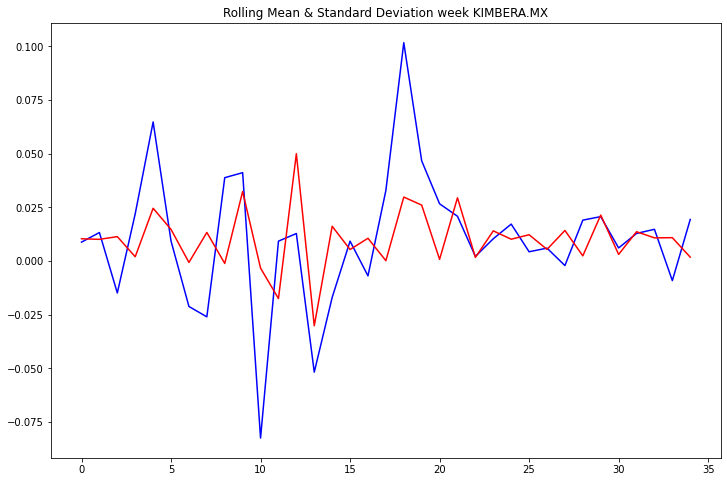

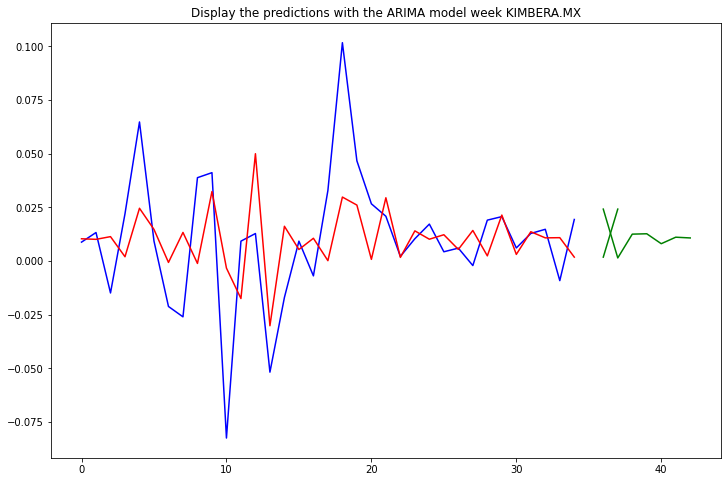

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  69.926
Date:                Fri, 17 Feb 2023   AIC                           -127.853
Time:                        23:37:13   BIC                           -118.520
Sample:                             0   HQIC                          -124.631
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.012     -0.131      0.896      -0.026       0.023
ar.L1          0.7445      0.454      1.642      0.101      -0.144       1.633
ar.L2         -0.5211      0.319     -1.635      0.1

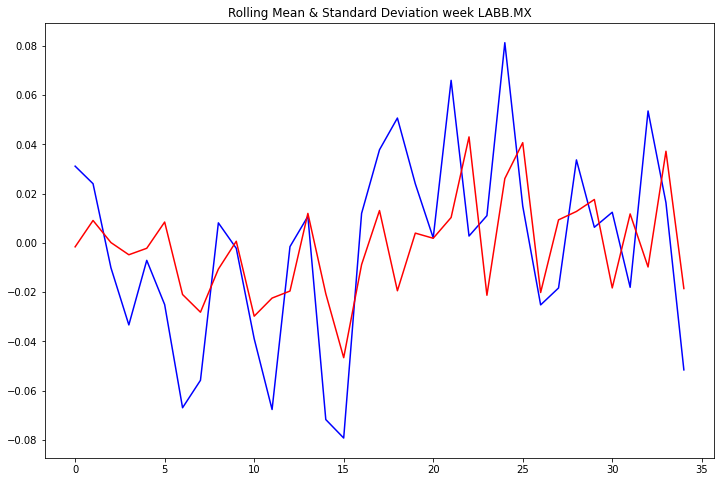

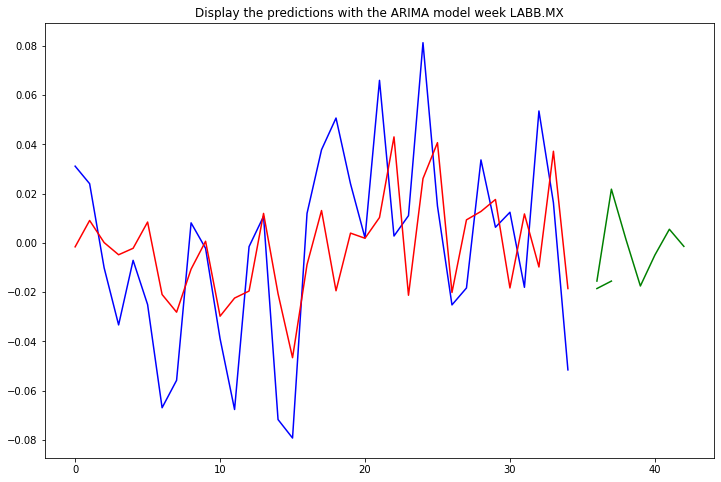

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  82.193
Date:                Fri, 17 Feb 2023   AIC                           -152.386
Time:                        23:37:15   BIC                           -143.054
Sample:                             0   HQIC                          -149.165
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.011      0.075      0.940      -0.021       0.023
ar.L1          0.9542      0.253      3.767      0.000       0.458       1.451
ar.L2         -0.6134      0.295     -2.079      0.0

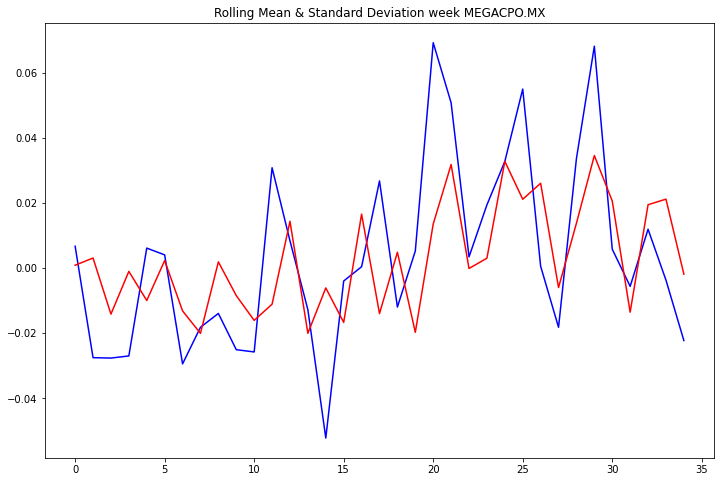

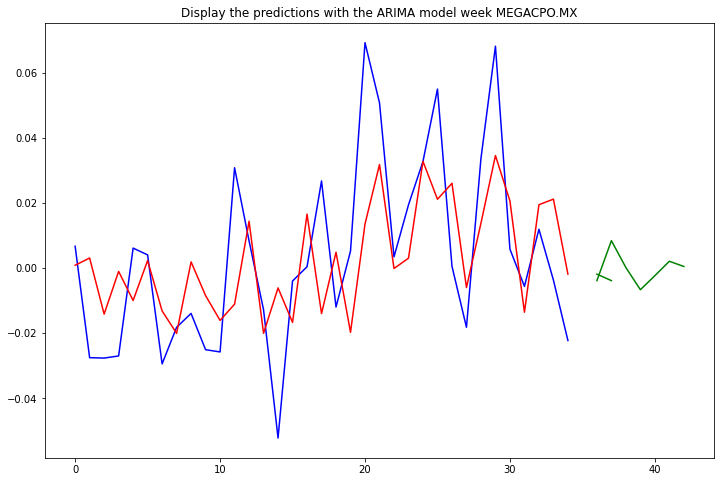

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  73.195
Date:                Fri, 17 Feb 2023   AIC                           -134.389
Time:                        23:37:16   BIC                           -125.057
Sample:                             0   HQIC                          -131.168
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0099      0.002      6.039      0.000       0.007       0.013
ar.L1          1.1080      0.271      4.094      0.000       0.578       1.638
ar.L2         -0.3812      0.360     -1.060      0.2

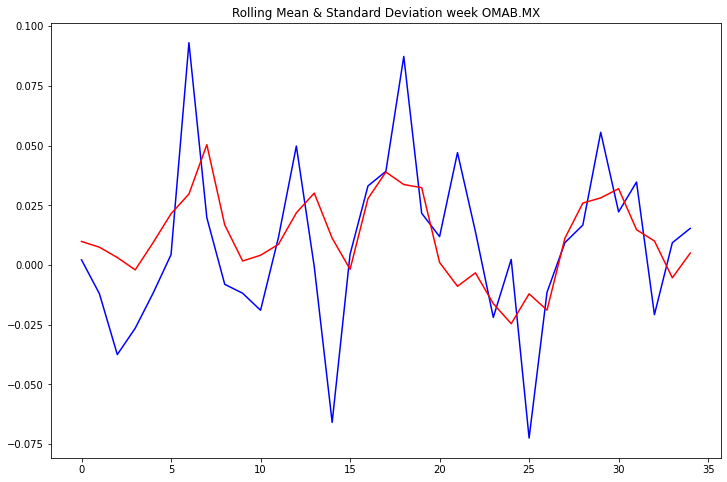

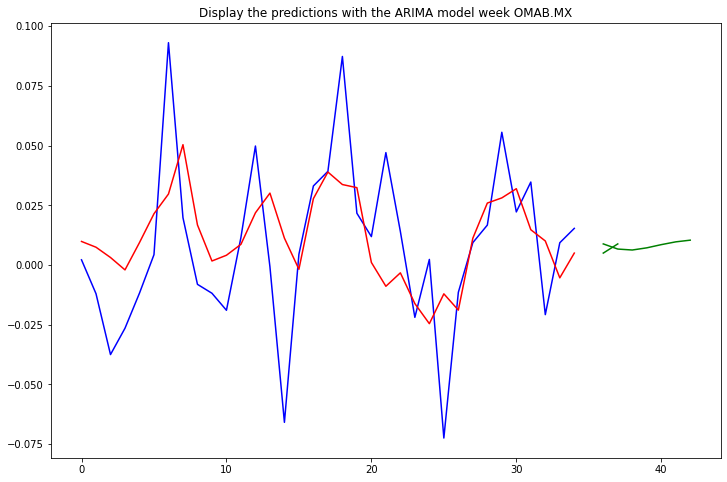

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  83.708
Date:                Fri, 17 Feb 2023   AIC                           -155.415
Time:                        23:37:17   BIC                           -146.083
Sample:                             0   HQIC                          -152.194
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0087      0.005      1.592      0.111      -0.002       0.019
ar.L1          0.9695      0.723      1.341      0.180      -0.448       2.387
ar.L2         -0.1542      0.422     -0.365      0.7

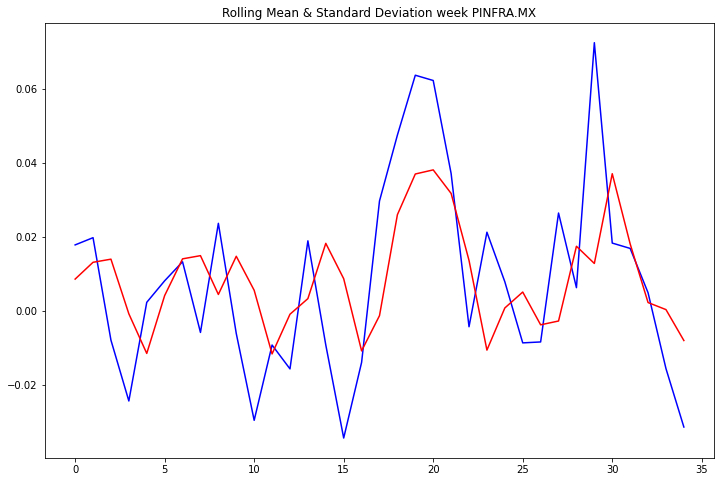

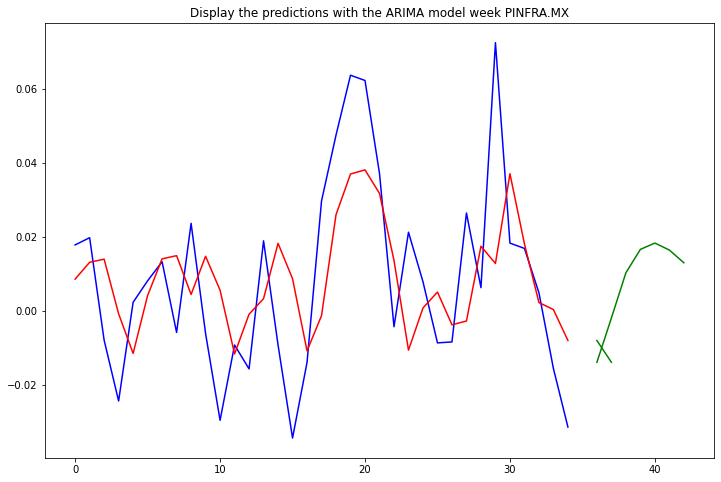

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  67.894
Date:                Fri, 17 Feb 2023   AIC                           -123.789
Time:                        23:37:18   BIC                           -114.457
Sample:                             0   HQIC                          -120.567
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0124      0.011     -1.168      0.243      -0.033       0.008
ar.L1         -0.0144      0.726     -0.020      0.984      -1.437       1.408
ar.L2          0.3070      0.258      1.189      0.2

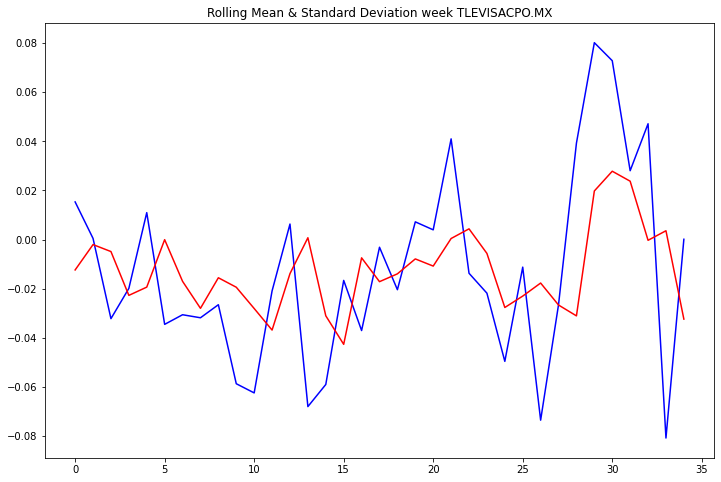

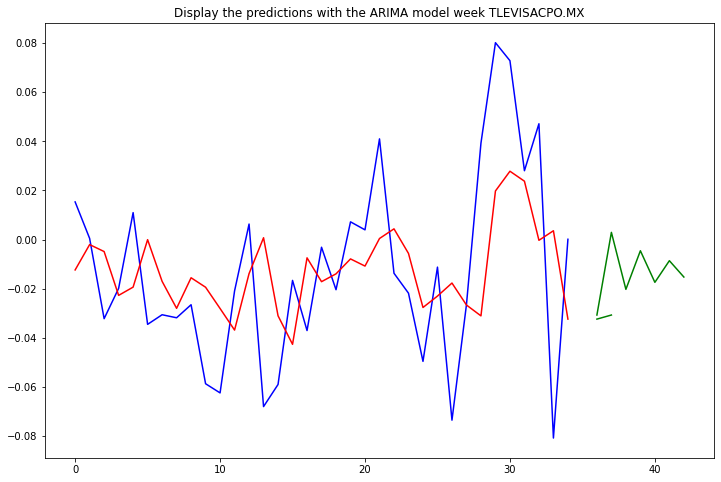

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

forcastlistINPC=[]

# the autocorrelation chart provides just the correlation at increasing lags
for h in range(len(udiffINPC.columns)):
    item=udiffINPC.columns.__getitem__(h)
    # Notice that you have to use udiff - the differenced data rather than the original data. 
    # ar1 = # TODO: Fit an ARIMA model to the differenced data
    ar1='{}'.format(item)
    ar1 = ARIMA(udiffINPC[item].values,order=(3,0,1)).fit()
    print(ar1)
    print(ar1.summary())
    
    # TODO: Plot the ARMA fitted values on the same plot as the differenced time series
    plt.figure(figsize=(12,8))
    plt.plot(udiffINPC[item].values,color='blue')
    preds=ar1.fittedvalues
    jo='Rolling Mean & Standard Deviation {}'.format(item)
    plt.title(jo)
    plt.plot(preds,color='red')
    plt.show()
    
    #forecast = # TODO: Use the ARMA model to create a forecast two weeks into the future
    
    steps=7

    forecast=ar1.forecast(steps=steps)
    
    forcastlistINPC.append(forecast)

    plt.figure(figsize=(12, 8))
    plt.plot(udiffINPC[item].values, color='blue')

    preds = ar1.fittedvalues
    plt.plot(preds, color='red')

    plt.plot(pd.DataFrame(np.array([preds[-1],forecast[0]]).T,index=range(len(udiffINPC[item].values)+1, len(udiffINPC[item].values)+3)), color='green')
    plt.plot(pd.DataFrame(forecast,index=range(len(udiffINPC[item].values)+1, len(udiffINPC[item].values)+1+steps)), color='green')
    jos='Display the predictions with the ARIMA model {}'.format(item)
    plt.title(jos)
    plt.show()

In [26]:
# lista de los forcast (predicciones) 
forcastlistINPC

[array([0.0118394 , 0.00323605, 0.00233799, 0.00676585, 0.00596833,
        0.00512909, 0.0057603 ]),
 array([-0.01347689,  0.02248785,  0.0296959 ,  0.02734319,  0.00943721,
        -0.00517089, -0.01400039]),
 array([-0.01715274, -0.00653099,  0.00022247,  0.00747066,  0.00909075,
         0.00858468,  0.00583437]),
 array([ 0.0197317 ,  0.01949527, -0.00439257, -0.00260638, -0.00765609,
         0.00105534, -0.00146029]),
 array([0.01931298, 0.01920701, 0.0131123 , 0.00690047, 0.00317317,
        0.00284705, 0.00490706]),
 array([0.03704383, 0.04081156, 0.03361991, 0.02492489, 0.0191427 ,
        0.01688471, 0.01697058]),
 array([0.00499378, 0.01897822, 0.02480396, 0.02443994, 0.02005431,
        0.01447112, 0.00972111]),
 array([-0.01355352,  0.00967428, -0.00266268,  0.00445599,  0.0018444 ,
         0.00266713,  0.002538  ]),
 array([0.00483971, 0.00476241, 0.0075339 , 0.00815763, 0.00840305,
        0.00857509, 0.00861556]),
 array([-0.00310064, -0.0007385 ,  0.00211546, -0.0009

week AC.MX
           0
36  0.011839
37  0.003236
38  0.002338
39  0.006766
40  0.005968
41  0.005129
42  0.005760


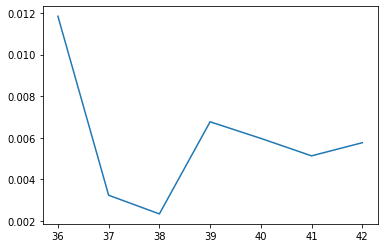

week ALPEKA.MX
           0
36 -0.013477
37  0.022488
38  0.029696
39  0.027343
40  0.009437
41 -0.005171
42 -0.014000


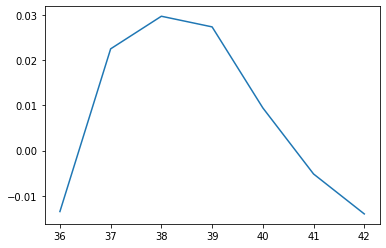

week ALSEA.MX
           0
36 -0.017153
37 -0.006531
38  0.000222
39  0.007471
40  0.009091
41  0.008585
42  0.005834


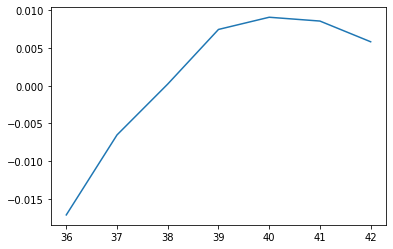

week AMXL.MX
           0
36  0.019732
37  0.019495
38 -0.004393
39 -0.002606
40 -0.007656
41  0.001055
42 -0.001460


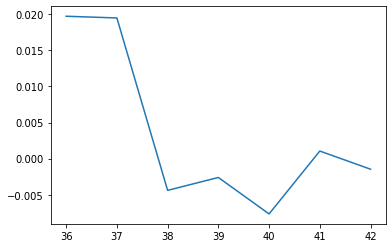

week ASURB.MX
           0
36  0.019313
37  0.019207
38  0.013112
39  0.006900
40  0.003173
41  0.002847
42  0.004907


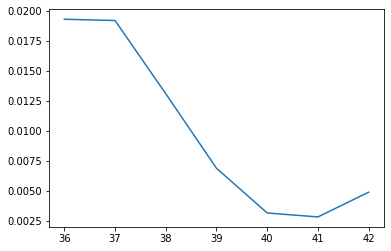

week BBAJIOO.MX
           0
36  0.037044
37  0.040812
38  0.033620
39  0.024925
40  0.019143
41  0.016885
42  0.016971


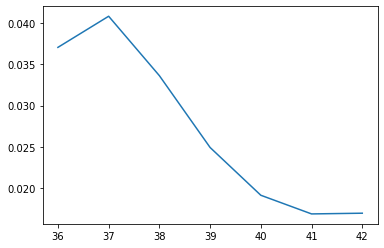

week BIMBOA.MX
           0
36  0.004994
37  0.018978
38  0.024804
39  0.024440
40  0.020054
41  0.014471
42  0.009721


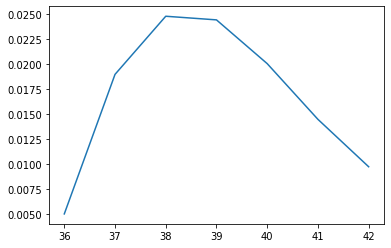

week BOLSAA.MX
           0
36 -0.013554
37  0.009674
38 -0.002663
39  0.004456
40  0.001844
41  0.002667
42  0.002538


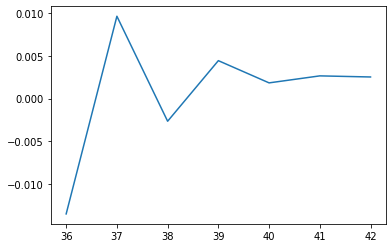

week CEMEXCPO.MX
           0
36  0.004840
37  0.004762
38  0.007534
39  0.008158
40  0.008403
41  0.008575
42  0.008616


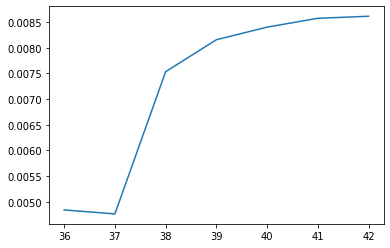

week CUERVO.MX
           0
36 -0.003101
37 -0.000738
38  0.002115
39 -0.000915
40  0.001123
41  0.000412
42  0.000456


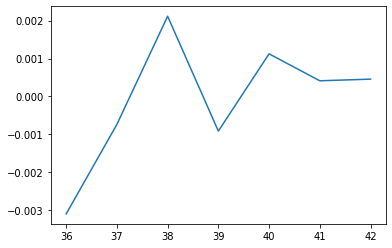

week FEMSAUBD.MX
           0
36  0.025027
37 -0.019023
38  0.015548
39  0.015977
40 -0.006034
41  0.004843
42  0.009506


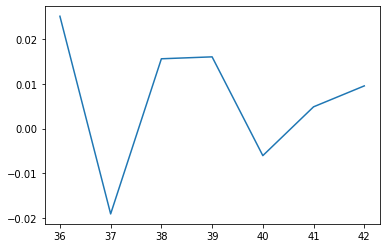

week GAPB.MX
           0
36  0.025588
37  0.000109
38  0.007420
39  0.004617
40  0.011451
41  0.008485
42  0.010207


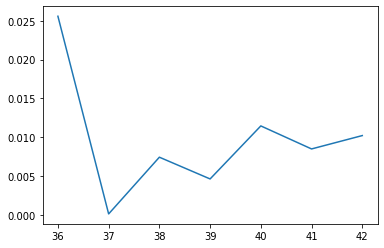

week GCARSOA1.MX
           0
36  0.003569
37  0.013310
38  0.010558
39  0.004968
40  0.003720
41  0.004760
42  0.005692


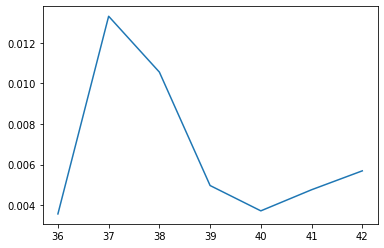

week GCC.MX
           0
36  0.006630
37  0.011583
38  0.005091
39  0.004505
40  0.005926
41  0.005967
42  0.005658


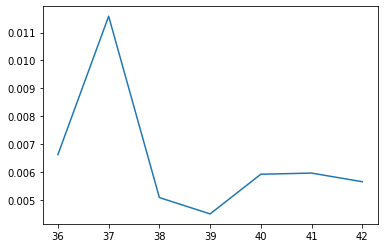

week GENTERA.MX
           0
36  0.014019
37 -0.005058
38  0.003515
39  0.010018
40  0.005754
41  0.007552
42  0.008412


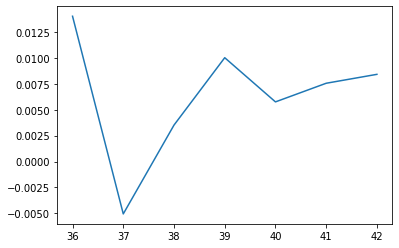

week GFNORTEO.MX
           0
36  0.023415
37  0.002745
38  0.006441
39  0.009895
40  0.013209
41  0.009273
42  0.010795


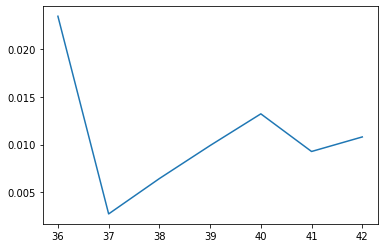

week GMEXICOB.MX
           0
36 -0.005568
37 -0.000968
38 -0.003362
39 -0.002743
40 -0.002446
41 -0.002796
42 -0.002637


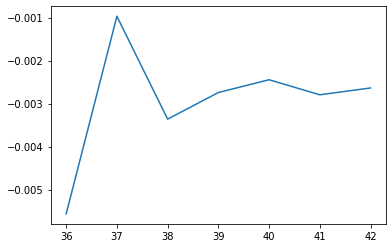

week GRUMAB.MX
           0
36 -0.004782
37  0.012187
38  0.012656
39  0.010231
40  0.005514
41  0.002572
42  0.001384


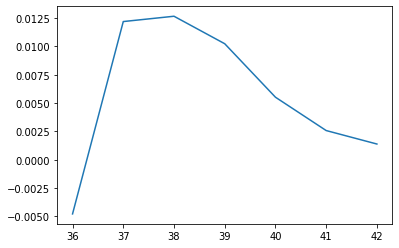

week IENOVA.MX
           0
36 -0.000005
37 -0.000005
38 -0.000005
39 -0.000005
40 -0.000005
41 -0.000005
42 -0.000005


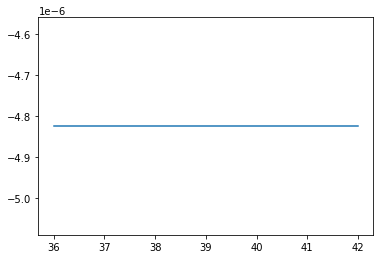

week KIMBERA.MX
           0
36  0.024172
37  0.001426
38  0.012507
39  0.012683
40  0.008056
41  0.011085
42  0.010736


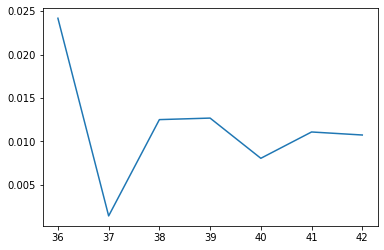

week LABB.MX
           0
36 -0.015521
37  0.021789
38  0.001483
39 -0.017512
40 -0.004960
41  0.005513
42 -0.001432


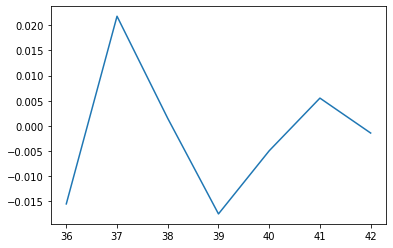

week MEGACPO.MX
           0
36 -0.003874
37  0.008391
38  0.000132
39 -0.006670
40 -0.002360
41  0.002063
42  0.000461


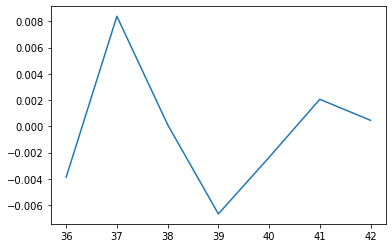

week OMAB.MX
           0
36  0.008840
37  0.006686
38  0.006285
39  0.007196
40  0.008533
41  0.009701
42  0.010411


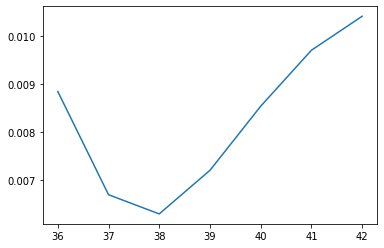

week PINFRA.MX
           0
36 -0.013826
37 -0.001868
38  0.010365
39  0.016685
40  0.018400
41  0.016505
42  0.013068


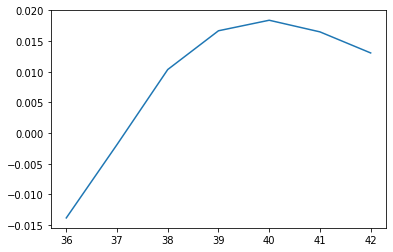

week TLEVISACPO.MX
           0
36 -0.030718
37  0.002930
38 -0.020267
39 -0.004555
40 -0.017411
41 -0.008605
42 -0.015251


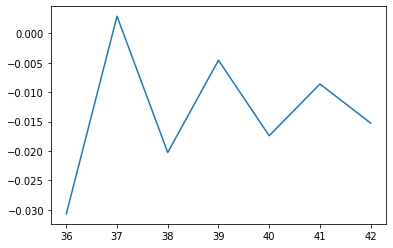

In [27]:
# Generamos esta grafica para ver más de cerca el pronostico del compotamiento de la emisora en una semana
for forc in range(len(udiffINPC.columns)):
    forcr=udiffINPC.columns.__getitem__(forc)
    lINPC=pd.DataFrame(forcastlistINPC[forc],index=range(len(udiffINPC[forcr].values)+1, len(udiffINPC[forcr].values)+1+steps))
    item=udiffINPC.columns.__getitem__(forc)
    # Notice that you have to use udiff - the differenced data rather than the original data. 
    # ar1 = # TODO: Fit an ARIMA model to the differenced data
    ar1='{}'.format(item)
    print(ar1)
    print(lINPC)
    plt.figure()
    plt.plot(lINPC)
    plt.show()

In [28]:
# Queremos quedarnos sólo con aquellas emisoras que se pronostica que vayan a subir significativamente en una semana
listaINPC=[]
for ar in range(len(forcastlistINPC)):
    item2=udiffINPC.columns.__getitem__(ar)
    arnasdaq='{}'.format(item2)
    fi=forcastlistINPC[ar][0]
    fm1=forcastlistINPC[ar][1]
    fm=forcastlistINPC[ar][3]
    ff=forcastlistINPC[ar][6]
    if ff>fi:
        listaINPC.append(item2)
        print('Invierte en: ', arnasdaq)

Invierte en:  week ALSEA.MX
Invierte en:  week BIMBOA.MX
Invierte en:  week BOLSAA.MX
Invierte en:  week CEMEXCPO.MX
Invierte en:  week CUERVO.MX
Invierte en:  week GCARSOA1.MX
Invierte en:  week GMEXICOB.MX
Invierte en:  week GRUMAB.MX
Invierte en:  week LABB.MX
Invierte en:  week MEGACPO.MX
Invierte en:  week OMAB.MX
Invierte en:  week PINFRA.MX
Invierte en:  week TLEVISACPO.MX


In [30]:
LISTAEMISORAS_INPC=[]
for i in listaINPC:
    wd = i.split()
    LISTAEMISORAS_INPC.append(wd[1])
LISTAEMISORAS_INPC

['ALSEA.MX',
 'BIMBOA.MX',
 'BOLSAA.MX',
 'CEMEXCPO.MX',
 'CUERVO.MX',
 'GCARSOA1.MX',
 'GMEXICOB.MX',
 'GRUMAB.MX',
 'LABB.MX',
 'MEGACPO.MX',
 'OMAB.MX',
 'PINFRA.MX',
 'TLEVISACPO.MX']

In [32]:
data_final_INPC=pd.DataFrame(LISTAEMISORAS_INPC, columns=['INPC'])
data_final_INPC

INPC
0        ALSEA.MX
1       BIMBOA.MX
2       BOLSAA.MX
3     CEMEXCPO.MX
4       CUERVO.MX
5     GCARSOA1.MX
6     GMEXICOB.MX
7       GRUMAB.MX
8         LABB.MX
9      MEGACPO.MX
10        OMAB.MX
11      PINFRA.MX
12  TLEVISACPO.MX

In [33]:
# Enviamos la data a excel
data_final_INPC.to_excel('data_final_INPC.xlsx')